In [166]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import missingno as msno 
import plotly.express as px
import pandas as pd 
from textblob import TextBlob
from wordcloud import WordCloud
from wordcloud import STOPWORDS

#settings :
pd.set_option('display.max_rows', 500)
pd.set_option('display.max_columns', 400)
pd.set_option('display.width', 150)
pd.set_option('display.max_colwidth',50)

In [167]:
data = pd.read_csv("D:\\SEPHORA\\sephora_website_dataset.csv")
data

id               brand            category                                        name  rating  number_of_reviews    love  price  \
0     2218774      Acqua Di Parma           Fragrance              Blu Mediterraneo MINIATURE Set     4.0                4.0  3002.0     66   
1     2044816      Acqua Di Parma             Cologne                                     Colonia     4.5               76.0  2700.0     66   
2     1417567      Acqua Di Parma             Perfume                            Arancia di Capri     4.5               26.0  2600.0    180   
3     1417617      Acqua Di Parma             Perfume                            Mirto di Panarea     4.5               23.0  2900.0    120   
4     2218766      Acqua Di Parma           Fragrance                       Colonia Miniature Set     3.5                2.0   943.0     72   
...       ...                 ...                 ...                                         ...     ...                ...     ...    ...   
9182  2208502  SEPHORA COLLECTION          Face Masks                          The Rose Gold Mask     2.0               15.0  6200.0      6   
9183  2298909  SEPHORA COLLECTION            Lip Sets  Give Me Some Sugar Colorful Gloss Balm Set     NaN                NaN   266.0     15   
9184  2236750  SEPHORA COLLECTION  Tinted Moisturizer               Weekend Warrior Tone Up Cream     NaN                NaN   445.0     16   
9185       50  SEPHORA COLLECTION         no category                                   Gift Card     5.0               46.0     NaN     50   
9186      304  SEPHORA COLLECTION         no category                    Happy Birthday Gift Card     NaN                NaN     NaN     50   

      value_price                                            options                                        ingredients  online_only  \
0            75.0                                         no options  Arancia di Capri Eau de Toilette: Alcohol Dena...            1   
1            66.0   - 0.7 oz/ 20 mL  Spray  - 1.7 oz/ 50 mL Eau d...                                            unknown            1   
2           180.0   - 1oz/30mL Eau de Toilette  - 2.5 oz/ 74 mL E...  Alcohol Denat.- Water- Fragrance- Limonene- Li...            1   
3           120.0   - 1 oz/ 30 mL Eau de Toilette Spray - 2.5 oz/...                                            unknown            1   
4            80.0                                         no options  Colonia: Alcohol Denat.- Water- Fragrance- Lim...            1   
...           ...                                                ...                                                ...          ...   
9182          6.0                                         no options  -Rose Quartz Extract: Hydrates dry skin.  Aqua...            0   
9183         27.0                                         no options  Colorful Gloss Balm Wanderlust: Hydrogenated P...            0   
9184         16.0                                         no options  Aqua (Water)- Dimethicone- Isohexadecane- Poly...            0   
9185         50.0                                         no options                                            unknown            0   
9186         50.0                                         no options                                            unknown            0   

      limited_edition  
0                   0  
1                   0  
2                   0  
3                   0  
4                   0  
...               ...  
9182                1  
9183                0  
9184                0  
9185                0  
9186                0  

[9187 rows x 13 columns]

In [168]:
data.shape

(9187, 13)

In [169]:
data.columns

Index(['id', 'brand', 'category', 'name', 'rating', 'number_of_reviews', 'love', 'price', 'value_price', 'options', 'ingredients', 'online_only',
       'limited_edition'],
      dtype='object')

# P2 LÀM SẠCH

In [170]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9187 entries, 0 to 9186
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   id                 9187 non-null   int64  
 1   brand              9187 non-null   object 
 2   category           9187 non-null   object 
 3   name               9187 non-null   object 
 4   rating             8787 non-null   float64
 5   number_of_reviews  8788 non-null   float64
 6   love               9006 non-null   float64
 7   price              9187 non-null   int64  
 8   value_price        9187 non-null   float64
 9   options            9187 non-null   object 
 10  ingredients        9187 non-null   object 
 11  online_only        9187 non-null   int64  
 12  limited_edition    9187 non-null   int64  
dtypes: float64(4), int64(4), object(5)
memory usage: 933.2+ KB


In [171]:
unique_counts = data.nunique()

# Chuyển kết quả thành DataFrame để dễ dàng hiển thị
unique_counts_df = pd.DataFrame(unique_counts).reset_index()
unique_counts_df.columns = ['Column', 'Unique Values']
print("Giá trị duy nhất của từng cột")
# Hiển thị bảng
print(unique_counts_df)

Giá trị duy nhất của từng cột
               Column  Unique Values
0                  id           9112
1               brand            324
2            category            143
3                name           9103
4              rating              9
5   number_of_reviews            832
6                love           1682
7               price            215
8         value_price            322
9             options            564
10        ingredients           6960
11        online_only              2
12    limited_edition              2


In [172]:
#Xem tổng quan các cột
missing = []
unique = []
types = []
variables = []
count = []

for item in data.columns:
    variables.append(item)
    missing.append(data[item].isnull().sum())
    unique.append(data[item].nunique())
    types.append(data[item].dtypes)
    count.append(len(data[item]))
    
output = pd.DataFrame({
    'variable': variables, 
    'dtype': types,
    'count': count,
    'unique': unique,
    'missing': missing, 
   
})
print("Df info : ")
output.sort_values("missing",ascending=False).reset_index(drop=True)

Df info : 


variable    dtype  count  unique  missing
0              rating  float64   9187       9      400
1   number_of_reviews  float64   9187     832      399
2                love  float64   9187    1682      181
3                  id    int64   9187    9112        0
4               brand   object   9187     324        0
5            category   object   9187     143        0
6                name   object   9187    9103        0
7               price    int64   9187     215        0
8         value_price  float64   9187     322        0
9             options   object   9187     564        0
10        ingredients   object   9187    6960        0
11        online_only    int64   9187       2        0
12    limited_edition    int64   9187       2        0

In [173]:
data['brand'].unique()

array(['Acqua Di Parma', 'AERIN', 'Aether Beauty', 'Algenist', 'Alpha-H',
       'alpyn beauty', 'ALTERNA Haircare', 'amika', 'AMOREPACIFIC',
       'Anastasia Beverly Hills', 'Anthony', 'Antonym', 'Aquis',
       'Armani Beauty', 'The Art of Shaving', 'Artis', 'Artist Couture',
       'Atelier Cologne', 'BALENCIAGA', 'bareMinerals', 'Beachwaver',
       'The Beauty Chef', 'BeautyBio', 'beautyblender', 'BECCA', 'belif',
       'Benefit Cosmetics', 'BERDOUES', 'Bésame Cosmetics',
       'Better Not Younger', 'Bio Ionic', 'Biossance', 'Bite Beauty',
       'bkr', 'Black Up', 'Blinc', 'Bobbi Brown', 'boscia', 'Briogeo',
       'Bumble and bumble', 'BURBERRY', 'Buxom', 'BVLGARI',
       'By Rosie Jane', 'Calvin Klein', 'Capri Blue', 'Carolina Herrera',
       'Caudalie', 'Cellu-cup', 'CHANEL', 'Charlotte Tilbury', 'Chloé',
       'Christian Louboutin', 'Christophe Robin', 'Ciaté London',
       'Cinema Secrets', 'Clarins', 'Clarisonic Skincare',
       'CLEAN RESERVE', 'CLINIQUE', 'Coal an

In [174]:
data['category'].unique()

array(['Fragrance', 'Cologne', 'Perfume', 'Body Mist & Hair Mist',
       'Body Lotions & Body Oils', 'Body Sprays & Deodorant',
       'Perfume Gift Sets', 'no category', 'Rollerballs & Travel Size',
       'Lip Balm & Treatment', 'Lotions & Oils', 'Eye Palettes',
       'Highlighter', 'Cheek Palettes', 'Lipstick', 'Face Serums',
       'Moisturizers', 'Value & Gift Sets', 'Eye Creams & Treatments',
       'Face Sunscreen', 'Lip Balms & Treatments', 'Mini Size',
       'Face Masks', 'Face Wash & Cleansers', 'Decollete & Neck Creams',
       'Face Oils', 'Hand Cream & Foot Cream', 'Face Primer',
       'Color Correct', 'Mists & Essences', 'Tinted Moisturizer',
       'Concealer', 'Beauty Supplements', 'Facial Peels', 'Exfoliators',
       'Conditioner', 'Shampoo', 'Hair Styling Products',
       'Scalp & Hair Treatments', 'Hair Masks', 'Hair Spray', 'Hair Oil',
       'Hair Primers', 'Dry Shampoo', 'Hair', 'Hair Thinning & Hair Loss',
       'Hair Straighteners & Flat Irons', 'Hair Dry

In [175]:
data['name'].unique()

array(['Blu Mediterraneo MINIATURE Set', 'Colonia', 'Arancia di Capri',
       ..., 'Weekend Warrior Tone Up Cream', 'Gift Card',
       'Happy Birthday Gift Card'], dtype=object)

In [176]:
data['rating'].unique()

array([4. , 4.5, 3.5, 5. , 3. , nan, 2.5, 2. , 1. , 1.5])

In [177]:
np.set_printoptions(suppress=True)
data['number_of_reviews'].unique()

array([    4.,    76.,    26.,    23.,     2.,    79.,    13.,     5.,
           3.,    16.,    19.,    44.,    nan,     1.,     6.,     7.,
          20.,    34.,    91.,    77.,    12.,    63.,    32.,    39.,
          33.,    48.,    17.,   386.,    52.,    11.,     9.,    14.,
         116.,   170.,    59.,    18.,    54.,    35.,   656.,  1000.,
          38.,   462.,   873.,   422.,   100.,   491.,   221.,   215.,
         234.,   184.,    58.,   302.,    73.,    24.,    21.,   232.,
          67.,    72.,    37.,   299.,   240.,    83.,    10.,   269.,
         160.,   110.,    65.,   179.,    55.,    97.,    93.,    46.,
         633.,   124.,    57.,    74.,    66.,   552.,   747.,   148.,
         174.,   104.,    96.,   117.,   150.,    29.,   187.,   195.,
         154.,   370.,   186.,   169.,   446.,    92.,    90.,   107.,
         157.,    98.,     8.,   133.,    86.,   429.,    71.,   175.,
         389.,   180.,    87.,   275.,    89.,   139.,   681.,    88.,
      

In [178]:
data['love'].unique()

array([3002., 2700., 2600., ...,  520.,  505.,  445.])

In [179]:
data['price'].unique()

array([ 66, 180, 120,  72, 210,  58, 142, 275,  80,  55,  50, 113,  70,
       245, 200, 130, 235,  30,  15, 175,  38,  44,  28, 115,  98, 125,
       112,  68,  74,  35, 118,  25,  94,  95,  84,  40,  82,  85,  96,
        36,  60,  42,  31,  33,  65,  48,  20,  75,  62, 129,  99,  52,
        34,  32,  45,  21,  37,  10,  24,  29,  12, 100,  14,  22,  16,
       150,  18, 250, 300, 260, 170,  90, 140, 105, 280,  23,  26,  49,
         9,  13,  17,   6,  56,  46,  64,  88,  78,  97,  77, 138, 126,
       122,  67,  51,  79, 370, 110,  27, 135, 107, 117,  19, 199,  69,
        59, 249,  39,  11,   5,  47, 230, 269, 169, 295, 299,  54, 102,
        41,  43,   8, 136, 103,  71,  86, 162, 114,  83,  73, 124,  92,
       123,  76,  89, 190, 172,  53,  57, 145,   7, 205, 132, 119, 108,
        93,  87, 137,  81,  61, 159, 165, 155, 149, 128, 104, 134, 350,
       215, 310, 225, 325, 152, 435, 549, 499, 399, 139, 290, 178, 189,
       148, 153, 296, 160, 168, 109, 146,  63, 154, 460, 182, 14

In [180]:
data['value_price'].unique()

array([ 75.  ,  66.  , 180.  , 120.  ,  80.  , 210.  ,  58.  , 142.  ,
       275.  ,  95.  ,  55.  ,  50.  , 143.  ,  70.  , 245.  , 279.  ,
       130.  , 235.  ,  30.  ,  15.  , 175.  ,  38.  ,  44.  ,  28.  ,
       115.  ,  98.  , 200.  , 112.  ,  68.  ,  74.  ,  35.  , 118.  ,
        25.  ,  94.  , 144.  ,  84.  ,  60.  ,  82.  ,  85.  , 137.  ,
        96.  ,  36.  ,  42.  ,  31.  ,  33.  ,  65.  ,  72.  ,  48.  ,
       129.  ,  40.  ,  20.  ,  62.  ,  99.  ,  52.  ,  34.  ,  97.  ,
        32.  ,  45.  ,  21.  ,  37.  ,  10.  ,  24.  ,  12.  , 100.  ,
        14.  ,  22.  ,  16.  , 150.  ,  18.  , 250.  , 165.  , 300.  ,
       260.  ,  81.  , 230.  ,  90.  , 197.  , 105.  , 280.  ,  23.  ,
        26.  ,  49.  ,   9.  ,  13.  ,  29.  ,  17.  ,   6.  ,  22.5 ,
        56.  ,  46.  ,  64.  ,  88.  ,  78.  ,  77.  , 138.  , 198.  ,
       122.  ,  67.  ,  51.  , 126.  ,  79.  , 170.  , 216.  , 483.  ,
        27.  , 140.  , 160.  , 190.  , 110.  , 107.  , 117.  ,  19.  ,
      

In [181]:
data['options'].unique()

array(['no options',
       ' - 0.7 oz/ 20 mL  Spray  - 1.7 oz/ 50 mL Eau de Cologne Spray - 3.4 oz/ 101 mL Eau de Cologne Spray',
       ' - 1oz/30mL Eau de Toilette  - 2.5 oz/ 74 mL Eau de Toilette Spray - 5 oz/ 148 mL Eau de Toilette Spray ',
       ' - 1 oz/ 30 mL Eau de Toilette Spray - 2.5 oz/ 74 mL Eau de Toilette Spray  - 5 oz/ 148 mL Eau de Toilette Spray',
       ' - 0.7 oz, 20 mL Eau de Parfum Spray - 1.7 oz/ 50 mL Eau de Parfum Spray - 3.4 oz/ 101 mL Eau de Parfum Spray ',
       ' - 1.7 oz/ 50 mL Eau de Cologne Spray  - 3.4 oz/ 101 mL Eau de Cologne Spray',
       ' - 1.7oz/50mL  Hair Mist  - 0.70oz/20mL Eau de Parfum Spray',
       ' - 1.7oz/50mL  Hair Mist ',
       ' - 1 oz / 30 mL Eau de Toilette Spray - 2.5 oz / 75 mL Eau de Toilette Spray ',
       ' - 1 oz/ 30 mL Eau de Toilette Spray - 2.5 oz/ 74 mL Eau de Toilette Spray ',
       ' - 0.70oz/20mL Eau de Parfum Spray - 1.7 oz/ 50 mL Eau de Parfum Spray  - 3.4 oz/ 100 mL Eau de Parfum Spray',
       ' - 1oz/30mL Eau 

In [182]:
data['online_only'].unique()

array([1, 0], dtype=int64)

In [183]:
data['limited_edition'].unique()

array([0, 1], dtype=int64)

In [184]:
#Xóa hàng có giá trị ở love, number_of_reviews, rating bị thiếu
data_cleaning = data.dropna(subset=['rating', 'number_of_reviews', 'love'], how='any') 
print("Dataframe sau khi xóa NUll:")
print(data_cleaning.info()),

Dataframe sau khi xóa NUll:
<class 'pandas.core.frame.DataFrame'>
Index: 8633 entries, 0 to 9182
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   id                 8633 non-null   int64  
 1   brand              8633 non-null   object 
 2   category           8633 non-null   object 
 3   name               8633 non-null   object 
 4   rating             8633 non-null   float64
 5   number_of_reviews  8633 non-null   float64
 6   love               8633 non-null   float64
 7   price              8633 non-null   int64  
 8   value_price        8633 non-null   float64
 9   options            8633 non-null   object 
 10  ingredients        8633 non-null   object 
 11  online_only        8633 non-null   int64  
 12  limited_edition    8633 non-null   int64  
dtypes: float64(4), int64(4), object(5)
memory usage: 944.2+ KB
None


(None,)

In [185]:
data_cleaning.head()

id           brand   category                            name  rating  number_of_reviews    love  price  value_price  \
0  2218774  Acqua Di Parma  Fragrance  Blu Mediterraneo MINIATURE Set     4.0                4.0  3002.0     66         75.0   
1  2044816  Acqua Di Parma    Cologne                         Colonia     4.5               76.0  2700.0     66         66.0   
2  1417567  Acqua Di Parma    Perfume                Arancia di Capri     4.5               26.0  2600.0    180        180.0   
3  1417617  Acqua Di Parma    Perfume                Mirto di Panarea     4.5               23.0  2900.0    120        120.0   
4  2218766  Acqua Di Parma  Fragrance           Colonia Miniature Set     3.5                2.0   943.0     72         80.0   

                                             options                                        ingredients  online_only  limited_edition  
0                                         no options  Arancia di Capri Eau de Toilette: Alcohol Dena...            1                0  
1   - 0.7 oz/ 20 mL  Spray  - 1.7 oz/ 50 mL Eau d...                                            unknown            1                0  
2   - 1oz/30mL Eau de Toilette  - 2.5 oz/ 74 mL E...  Alcohol Denat.- Water- Fragrance- Limonene- Li...            1                0  
3   - 1 oz/ 30 mL Eau de Toilette Spray - 2.5 oz/...                                            unknown            1                0  
4                                         no options  Colonia: Alcohol Denat.- Water- Fragrance- Lim...            1                0

In [186]:
#Đếm giá trị trống trên từng cột
nan_counts = data_cleaning.isnull().sum() 
print(nan_counts)

id                   0
brand                0
category             0
name                 0
rating               0
number_of_reviews    0
love                 0
price                0
value_price          0
options              0
ingredients          0
online_only          0
limited_edition      0
dtype: int64


In [187]:
#Trước khi xóa duplicate
data_cleaning.shape

(8633, 13)

In [188]:
# Tìm các dòng bị trùng lặp
duplicate_rows = data_cleaning[data_cleaning.duplicated(keep=False)]

# Hiển thị các dòng trùng 
duplicate_rows

id               brand                         category                                               name  rating  number_of_reviews  \
237   1958024               amika  Hair Straighteners & Flat Irons                      The Antidote Silk Wrap Styler     3.5               20.0   
238   2190254               amika                    Curling Irons         The Autopilot 3-in-1 Rotating Curling Iron     3.0                4.0   
240   2187698        AMOREPACIFIC                     Facial Peels       Treatment Enzyme Exfoliating Powder Cleanser     4.5             1000.0   
241   1958024               amika  Hair Straighteners & Flat Irons                      The Antidote Silk Wrap Styler     3.5               20.0   
242   2190254               amika                    Curling Irons         The Autopilot 3-in-1 Rotating Curling Iron     3.0                4.0   
244   2187698        AMOREPACIFIC                     Facial Peels       Treatment Enzyme Exfoliating Powder Cleanser     4.5             1000.0   
485   2263796     Atelier Cologne                Perfume Gift Sets                              Citrus Mini Spray Set     4.5                3.0   
486   2263796     Atelier Cologne                Perfume Gift Sets                              Citrus Mini Spray Set     4.5                3.0   
698   1862846               belif                      Face Serums             Peat Miracle Revital Serum Concentrate     4.5               38.0   
699   1862846               belif                      Face Serums             Peat Miracle Revital Serum Concentrate     4.5               38.0   
918   1289594         Bobbi Brown                          Perfume                                    Beach Fragrance     4.0              414.0   
919   1289594         Bobbi Brown                          Perfume                                    Beach Fragrance     4.0              414.0   
1310  2233864           Cellu-cup        Cellulite & Stretch Marks                                Cellu-Cup Pineapple     3.5                5.0   
1311  2233864           Cellu-cup        Cellulite & Stretch Marks                                Cellu-Cup Pineapple     3.5                5.0   
2002  2221133         Dermalogica                        Mini Size                 Daily Microfoliant Exfoliator Mini     4.5              100.0   
2003  2221133         Dermalogica                        Mini Size                 Daily Microfoliant Exfoliator Mini     4.5              100.0   
2226  2150829                Dior                          Perfume                                     J'adore Absolu     4.5                5.0   
2227  2150829                Dior                          Perfume                                     J'adore Absolu     4.5                5.0   
3263  2057495            GLAMGLOW                       Face Masks  GLAMGLOW X MY LITTLE PONY #GLITTERMASK GRAVITY...     4.0              214.0   
3264  2057495            GLAMGLOW                       Face Masks  GLAMGLOW X MY LITTLE PONY #GLITTERMASK GRAVITY...     4.0              214.0   
3706  2334522                ILIA                         Lipstick                                        Multi-Stick     4.0              190.0   
3707  2334522                ILIA                         Lipstick                                        Multi-Stick     4.0              190.0   
4547  1918713              Kopari           Lip Balms & Treatments                                 Coconut Lip Glossy     4.5              623.0   
4548  1918713              Kopari           Lip Balms & Treatments                                 Coconut Lip Glossy     4.5              623.0   
5228  1895283     Maison Margiela                          Perfume                  ’REPLICA’ Fantasies: Across Sands     3.5               23.0   
5229  1895283     Maison Margiela                          Perfume                  ’REPLICA’ Fantasies: Across Sands     3.5               23.0   
6712  2077667  

In [189]:
# Xem các dòng bị trùng lặp 
duplicate_rows = data_cleaning[data_cleaning.duplicated()] 
print("\nCác hàng bị trùng lặp:") 
duplicate_rows


Các hàng bị trùng lặp:


id               brand                         category                                               name  rating  number_of_reviews  \
241   1958024               amika  Hair Straighteners & Flat Irons                      The Antidote Silk Wrap Styler     3.5               20.0   
242   2190254               amika                    Curling Irons         The Autopilot 3-in-1 Rotating Curling Iron     3.0                4.0   
244   2187698        AMOREPACIFIC                     Facial Peels       Treatment Enzyme Exfoliating Powder Cleanser     4.5             1000.0   
486   2263796     Atelier Cologne                Perfume Gift Sets                              Citrus Mini Spray Set     4.5                3.0   
699   1862846               belif                      Face Serums             Peat Miracle Revital Serum Concentrate     4.5               38.0   
919   1289594         Bobbi Brown                          Perfume                                    Beach Fragrance     4.0              414.0   
1311  2233864           Cellu-cup        Cellulite & Stretch Marks                                Cellu-Cup Pineapple     3.5                5.0   
2003  2221133         Dermalogica                        Mini Size                 Daily Microfoliant Exfoliator Mini     4.5              100.0   
2227  2150829                Dior                          Perfume                                     J'adore Absolu     4.5                5.0   
3264  2057495            GLAMGLOW                       Face Masks  GLAMGLOW X MY LITTLE PONY #GLITTERMASK GRAVITY...     4.0              214.0   
3707  2334522                ILIA                         Lipstick                                        Multi-Stick     4.0              190.0   
4548  1918713              Kopari           Lip Balms & Treatments                                 Coconut Lip Glossy     4.5              623.0   
5229  1895283     Maison Margiela                          Perfume                  ’REPLICA’ Fantasies: Across Sands     3.5               23.0   
6713  2077667       Pretty Vulgar                          Bronzer                           Bronzed B Powder Bronzer     4.5               21.0   
7652  1930759      Sol de Janeiro            Body Mist & Hair Mist                Brazilian Crush Body Fragrance Mist     4.5              804.0   
7886  2012276            TAN-LUXE                         For Face                 THE WATER Hydrating Self-Tan Water     4.0               52.0   
8201  1449289            TOM FORD                          Perfume                                    Tobacco Vanille     4.5              132.0   
8531  2047561         Urban Decay                     Eye Palettes                                  Naked Petite Heat     4.5              206.0   
8765  2120772             Vitruvi                Holistic Wellness                                     Stone Diffuser     4.0               28.0   
9169  2164002  SEPHORA COLLECTION                     Face Brushes        Makeup Match Full Coverage Foundation Brush     4.5              116.0   

         love  price  value_price                                options                                        ingredients  online_only  \
241    1800.0    150        150.0                             no options                                            unknown            0   
242     751.0    120        120.0                             no options                                            unknown            1   
244   55700.0     60         60.0                             no options   -Green Tea-derived Probiotic Enzyme (Lactobac...            0   
486    1200.0     78        126.0                             no options                                            unknown            1   
699    7500.0     60         60.0                             no options    -Peat: Apure- potent source of herbal energy...            0   
919   11200.0     79         79.0   - 1.7 oz/ 50 mL Eau de Par

In [190]:
# Xóa các dòng trùng lặp và giữ lại dòng đầu tiên 
data_cleaned = data_cleaning.drop_duplicates(keep='first')

In [191]:
data_cleaned.shape

(8613, 13)

In [192]:
# Kiểm tra còn dòng trùng lặp không 
# Đếm số dòng bị trùng lặp 
so_dong_trung_lap = data_cleaned.duplicated().sum() 
print("Số dòng bị trùng lặp:", so_dong_trung_lap)

Số dòng bị trùng lặp: 0


In [193]:
data_cleaned.head()

id           brand   category                            name  rating  number_of_reviews    love  price  value_price  \
0  2218774  Acqua Di Parma  Fragrance  Blu Mediterraneo MINIATURE Set     4.0                4.0  3002.0     66         75.0   
1  2044816  Acqua Di Parma    Cologne                         Colonia     4.5               76.0  2700.0     66         66.0   
2  1417567  Acqua Di Parma    Perfume                Arancia di Capri     4.5               26.0  2600.0    180        180.0   
3  1417617  Acqua Di Parma    Perfume                Mirto di Panarea     4.5               23.0  2900.0    120        120.0   
4  2218766  Acqua Di Parma  Fragrance           Colonia Miniature Set     3.5                2.0   943.0     72         80.0   

                                             options                                        ingredients  online_only  limited_edition  
0                                         no options  Arancia di Capri Eau de Toilette: Alcohol Dena...            1                0  
1   - 0.7 oz/ 20 mL  Spray  - 1.7 oz/ 50 mL Eau d...                                            unknown            1                0  
2   - 1oz/30mL Eau de Toilette  - 2.5 oz/ 74 mL E...  Alcohol Denat.- Water- Fragrance- Limonene- Li...            1                0  
3   - 1 oz/ 30 mL Eau de Toilette Spray - 2.5 oz/...                                            unknown            1                0  
4                                         no options  Colonia: Alcohol Denat.- Water- Fragrance- Lim...            1                0

In [194]:
#Loại bỏ khoảng trắng thừa
data_cleaned.loc[:,'ingredients'] = data_cleaned['ingredients'].str.strip()
data_cleaned.loc[:,'ingredients'] = data_cleaned['ingredients'].str.replace(r'\s+', ' ', regex=True)

In [195]:
#Xử lý ký tự đặc biệt và lỗi định dạng
# Xử lý ký tự đặc biệt và lỗi định dạng, chỉ giữ lại dấu gạch ngang
data_cleaned.loc[:, 'ingredients'] = data_cleaned['ingredients'].str.replace(r'[^\w\s-]', '', regex=True)


In [196]:
# Xử lý ký tự đặc biệt và lỗi định dạng, chỉ giữ lại dấu gạch ngang và xóa dấu gạch ngang đầu tiên 
data_cleaned.loc[:, 'ingredients'] = data_cleaned['ingredients'].str.replace(r'^-', '', regex=True) 
data_cleaned.loc[:, 'ingredients'] = data_cleaned['ingredients'].str.replace(r'[^\w\s-]', '', regex=True)

In [197]:
#Lưu dataframe vào tệp csv
data_cleaned.to_csv('D:\\SEPHORA\\Sephora_New.csv',index=False)

In [198]:
#Sử dụng dataframe hoàn chỉnh
data_hc = pd.read_csv("D:\\SEPHORA\\Sephora_New.csv")
data_hc.head()

id           brand   category                            name  rating  number_of_reviews    love  price  value_price  \
0  2218774  Acqua Di Parma  Fragrance  Blu Mediterraneo MINIATURE Set     4.0                4.0  3002.0     66         75.0   
1  2044816  Acqua Di Parma    Cologne                         Colonia     4.5               76.0  2700.0     66         66.0   
2  1417567  Acqua Di Parma    Perfume                Arancia di Capri     4.5               26.0  2600.0    180        180.0   
3  1417617  Acqua Di Parma    Perfume                Mirto di Panarea     4.5               23.0  2900.0    120        120.0   
4  2218766  Acqua Di Parma  Fragrance           Colonia Miniature Set     3.5                2.0   943.0     72         80.0   

                                             options                                        ingredients  online_only  limited_edition  
0                                         no options  Arancia di Capri Eau de Toilette Alcohol Denat...            1                0  
1   - 0.7 oz/ 20 mL  Spray  - 1.7 oz/ 50 mL Eau d...                                            unknown            1                0  
2   - 1oz/30mL Eau de Toilette  - 2.5 oz/ 74 mL E...  Alcohol Denat- Water- Fragrance- Limonene- Lin...            1                0  
3   - 1 oz/ 30 mL Eau de Toilette Spray - 2.5 oz/...                                            unknown            1                0  
4                                         no options  Colonia Alcohol Denat- Water- Fragrance- Limon...            1                0

In [199]:
data_hc['category']=data_hc['category'].replace(['Fragrance', 'Cologne', 'Perfume', 'Body Mist & Hair Mist', 'Perfume Gift Sets', 'Rollerballs & Travel Size', 'Body Sprays & Deodorant', 'Deodorant & Antiperspirant', 'Deodorant for Men', 'Candles & Home Scents', 'Candles', 'Diffusers'],'Fragrance & Scents')
data_hc['category']=data_hc['category'].replace(['Face Serums', 'Moisturizers', 'Face Oils', 'Face Sunscreen', 'Face Masks', 'Face Wash & Cleansers', 'Decollete & Neck Creams', 'Eye Creams & Treatments', 'Eye Masks', 'Eye Cream', 'Anti-Aging', 'Facial Peels', 'Exfoliators', 'Toners', 'Mists & Essences', 'Night Creams','Sheet Masks','Skincare','Blemish & Acne Treatments','Moisturizer & Treatments','Blotting Papers','Sunscreen','For Face'],'Face Care')
data_hc['category']=data_hc['category'].replace(['Lip Balm & Treatment', 'Lip Balms & Treatments', 'Lip Sunscreen', 'Lip Treatments'],'Lip Care')
data_hc['category']=data_hc['category'].replace(['Body Lotions & Body Oils', 'Body Sunscreen', 'Body Wash & Shower Gel', 'Body Products', 'Body Moisturizers', 'Bath & Shower', 'Bath Soaks & Bubble Bath', 'After Sun Care', 'Scrub & Exfoliants', 'Cellulite & Stretch Marks', 'Shaving', 'Hand Cream & Foot Cream','Lotions & Oils','Self Tanners','Bath & Body','Hair Removal','Hair Removal & Shaving','For Body'], 'Body Care')
data_hc['category']=data_hc['category'].replace(['Facial Rollers', 'Facial Cleansing Brushes', 'Cleansing Brushes', 'High Tech Tools', 'Spa Tools'], 'Skincare Tools')
data_hc['category']=data_hc['category'].replace(['Foundation', 'Concealer', 'BB & CC Cream', 'BB & CC Creams', 'Tinted Moisturizer', 'Highlighter', 'Blush', 'Bronzer', 'Contour', 'Setting Spray & Powder', 'Color Correct','Face Primer','Makeup','Cheek Palettes'], 'Face Makeup')
data_hc['category']=data_hc['category'].replace(['Eyeshadow', 'Eye Palettes', 'Mascara', 'Eyeliner', 'Eyebrow', 'Eye Primer', 'False Eyelashes', 'Eye Brushes', 'Eye Sets'], 'Eye Makeup')
data_hc['category']=data_hc['category'].replace(['Lipstick', 'Lip Gloss', 'Lip Liner', 'Liquid Lipstick', 'Lip Stain', 'Lip Plumper', 'Lip Sets'], 'Lip Makeup')
data_hc['category']=data_hc['category'].replace(['Brush Sets', 'Brush Cleaners', 'Powder Brush', 'Sponges & Applicators', 'Tweezers & Eyebrow Tools', 'Mirrors & Sharpeners', 'Makeup Brushes', 'Makeup Bags & Travel Cases', 'Eyelash Curlers','Face Brushes','Makeup & Travel Cases','Lip Brushes','Accessories','Lid Shadow Brush'], 'Makeup Tools & Accessories')
data_hc['category']=data_hc['category'].replace(['Makeup Palettes', 'Face Sets'], 'Makeup Palettes & Sets')
data_hc['category']=data_hc['category'].replace(['Shampoo', 'Conditioner', 'Shampoo & Conditioner', 'Hair Masks', 'Hair Oil', 'Leave-In Conditioner', 'Dry Shampoo', 'Scalp & Hair Treatments', 'Hair Thinning & Hair Loss', 'Color Care','Hair'], 'Hair Care Products')
data_hc['category']=data_hc['category'].replace(['Hair Styling Products', 'Hair Spray', 'Hair Primers', 'Curls & Coils', 'Hair Accessories'], 'Hair Styling Products')
data_hc['category']=data_hc['category'].replace(['Hair Straighteners & Flat Irons', 'Hair Dryers', 'Curling Irons', 'Hair Brushes & Combs'], 'Hair Tools')
data_hc['category']=data_hc['category'].replace(['Hair Products', 'Hair Styling & Treatments'], 'General Hair Products')
data_hc['category']=data_hc['category'].replace(['Nail'],'Nail Care')
data_hc['category']=data_hc['category'].replace(['Cologne Gift Sets', 'Perfume Gift Sets', 'Value & Gift Sets', 'Lip Sets', 'Face Sets','Mini Size','Skincare Sets'],'Gift Sets & Special Products')
data_hc['category']=data_hc['category'].replace(['Teeth Whitening','Aftershave'],'Oral & Dental Care')
data_hc['category']=data_hc['category'].replace(['Holistic Wellness', 'Beauty Supplements', 'Wellness'],'Wellness & Holistic Products')
data_hc['category']=data_hc['category'].replace(['no category'],'Miscellaneous Categories')
data_hc['category']=data_hc['category'].replace(['Face Wipes','Makeup Removers','Face Wash'],'Cleansing')

In [200]:
data_hc['category'].nunique()

20

In [201]:
data_hc

id               brand                    category                                               name  rating  number_of_reviews  \
0     2218774      Acqua Di Parma          Fragrance & Scents                     Blu Mediterraneo MINIATURE Set     4.0                4.0   
1     2044816      Acqua Di Parma          Fragrance & Scents                                            Colonia     4.5               76.0   
2     1417567      Acqua Di Parma          Fragrance & Scents                                   Arancia di Capri     4.5               26.0   
3     1417617      Acqua Di Parma          Fragrance & Scents                                   Mirto di Panarea     4.5               23.0   
4     2218766      Acqua Di Parma          Fragrance & Scents                              Colonia Miniature Set     3.5                2.0   
...       ...                 ...                         ...                                                ...     ...                ...   
8608  2102804  SEPHORA COLLECTION                   Body Care               Moisturizing Body Milk - Beach Vibes     4.0               32.0   
8609  2149847  SEPHORA COLLECTION                   Body Care          Fizzing Bath Star Mini - Surprise Flowers     3.5               11.0   
8610  1601111  SEPHORA COLLECTION  Makeup Tools & Accessories                  Face the Day: Full Face Brush Set     3.5               62.0   
8611  2149839  SEPHORA COLLECTION                   Body Care  Exfoliating Body Granita Scrub - Surprise Flowers     3.5               39.0   
8612  2208502  SEPHORA COLLECTION                   Face Care                                 The Rose Gold Mask     2.0               15.0   

         love  price  value_price                                            options                                        ingredients  \
0      3002.0     66         75.0                                         no options  Arancia di Capri Eau de Toilette Alcohol Denat...   
1      2700.0     66         66.0   - 0.7 oz/ 20 mL  Spray  - 1.7 oz/ 50 mL Eau d...                                            unknown   
2      2600.0    180        180.0   - 1oz/30mL Eau de Toilette  - 2.5 oz/ 74 mL E...  Alcohol Denat- Water- Fragrance- Limonene- Lin...   
3      2900.0    120        120.0   - 1 oz/ 30 mL Eau de Toilette Spray - 2.5 oz/...                                            unknown   
4       943.0     72         80.0                                         no options  Colonia Alcohol Denat- Water- Fragrance- Limon...   
...       ...    ...          ...                                                ...                                                ...   
8608   4800.0     12         12.0                                         no options  Water- Glycerin- Dimethicone- Isopropyl Palmit...   
8609   2100.0      2          2.0                                         no options  Sodium Bicarbonate- Citric Acid- CI 77891 Tita...   
8610  32900.0     49         95.0                                         no options                                            unknown   
8611   6900.0      8          8.0                                         no options  Water- Glycerin- Cellulose Acetate- Sodium Lau...   
8612   6200.0      6          6.0                                         no options  Rose Quartz Extract Hydrates dry skin Aqua Wat...   

      online_only  limited_edition  
0               1                0  
1               1                0  
2               1                0  
3               1                0  
4               1                0  
...           ...              ...  
8608            1                0  
8609            1                0  
8610            0                1  
8611            1                0  
8612            0                1  

[8613 rows x 13 columns]

In [202]:
unique_values = data_hc['category'].unique() 
print(unique_values)

['Fragrance & Scents' 'Body Care' 'Lip Care' 'Eye Makeup' 'Face Makeup'
 'Lip Makeup' 'Face Care' 'Gift Sets & Special Products'
 'Wellness & Holistic Products' 'Hair Care Products'
 'Hair Styling Products' 'Hair Tools' 'Makeup Tools & Accessories'
 'Cleansing' 'Oral & Dental Care' 'Makeup Palettes & Sets'
 'Skincare Tools' 'Nail Care' 'General Hair Products'
 'Miscellaneous Categories']


In [203]:
# Giảm chiều dữ liệu
pd.set_option('display.max_rows', None)
data_category=data_hc.category.value_counts(dropna=False)
data_category

category
Face Care                       2164
Fragrance & Scents              1330
Face Makeup                     1004
Eye Makeup                       852
Hair Care Products               661
Body Care                        471
Gift Sets & Special Products     444
Lip Makeup                       352
Makeup Tools & Accessories       326
Hair Styling Products            322
Lip Care                         162
Wellness & Holistic Products     128
Hair Tools                       111
Makeup Palettes & Sets            64
Skincare Tools                    64
Cleansing                         60
Nail Care                         56
Oral & Dental Care                32
General Hair Products              7
Miscellaneous Categories           3
Name: count, dtype: int64

In [204]:
category_lessthan50=data_category[data_category<=50]
category_lessthan50

category
Oral & Dental Care          32
General Hair Products        7
Miscellaneous Categories     3
Name: count, dtype: int64

In [205]:
data_hc.category=data_hc.category.apply(lambda x: 'other' if x in category_lessthan50 else x)
len(data_hc.category.unique())

18

In [206]:
import pandas as pd

# Hiển thị toàn bộ các dòng
pd.set_option('display.max_rows', None)

# Tính toán giá trị và giữ nguyên thứ tự
data_category = data_hc.category.value_counts(dropna=False)

# Chuyển Series thành DataFrame
data_category = data_category.reset_index()

# Đổi tên cột cho dễ đọc
data_category.columns = ['category', 'count']

# Tách "other" ra và ghép lại cuối
other_row = data_category[data_category['category'] == 'other']
data_category = data_category[data_category['category'] != 'other']
data_category = pd.concat([data_category, other_row], ignore_index=True)

pd.set_option('display.max_rows', None)
data_category

category  count
0                      Face Care   2164
1             Fragrance & Scents   1330
2                    Face Makeup   1004
3                     Eye Makeup    852
4             Hair Care Products    661
5                      Body Care    471
6   Gift Sets & Special Products    444
7                     Lip Makeup    352
8     Makeup Tools & Accessories    326
9          Hair Styling Products    322
10                      Lip Care    162
11  Wellness & Holistic Products    128
12                    Hair Tools    111
13        Makeup Palettes & Sets     64
14                Skincare Tools     64
15                     Cleansing     60
16                     Nail Care     56
17                         other     42

In [207]:
# Lấy cột 'category' từ DataFrame
data_gc = data_hc['category']

# Chuyển cột 'category' thành mảng và in
category_array = np.array(data_gc)
print(category_array)

['Fragrance & Scents' 'Fragrance & Scents' 'Fragrance & Scents' ...
 'Makeup Tools & Accessories' 'Body Care' 'Face Care']


# P3 PHÂN TÍCH MÔ TẢ

In [208]:
data_numeric = data_cleaned.select_dtypes(include=['float64', 'int64'])

In [209]:
correlation_matrix = data_numeric.corr()
print(correlation_matrix)

                         id    rating  number_of_reviews      love     price  value_price  online_only  limited_edition
id                 1.000000 -0.082364          -0.170590 -0.094431 -0.031524    -0.012373     0.137302         0.185635
rating            -0.082364  1.000000           0.047585  0.055529  0.077509     0.080116    -0.019360        -0.001996
number_of_reviews -0.170590  0.047585           1.000000  0.747230 -0.088025    -0.092005    -0.134754        -0.063043
love              -0.094431  0.055529           0.747230  1.000000 -0.093808    -0.094946    -0.135303        -0.038386
price             -0.031524  0.077509          -0.088025 -0.093808  1.000000     0.984712     0.114214        -0.002447
value_price       -0.012373  0.080116          -0.092005 -0.094946  0.984712     1.000000     0.123203         0.056440
online_only        0.137302 -0.019360          -0.134754 -0.135303  0.114214     0.123203     1.000000         0.071492
limited_edition    0.185635 -0.001996   

In [210]:
data_numeric.info()

<class 'pandas.core.frame.DataFrame'>
Index: 8613 entries, 0 to 9182
Data columns (total 8 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   id                 8613 non-null   int64  
 1   rating             8613 non-null   float64
 2   number_of_reviews  8613 non-null   float64
 3   love               8613 non-null   float64
 4   price              8613 non-null   int64  
 5   value_price        8613 non-null   float64
 6   online_only        8613 non-null   int64  
 7   limited_edition    8613 non-null   int64  
dtypes: float64(4), int64(4)
memory usage: 605.6 KB


In [211]:
data_numeric.corr()

id    rating  number_of_reviews      love     price  value_price  online_only  limited_edition
id                 1.000000 -0.082364          -0.170590 -0.094431 -0.031524    -0.012373     0.137302         0.185635
rating            -0.082364  1.000000           0.047585  0.055529  0.077509     0.080116    -0.019360        -0.001996
number_of_reviews -0.170590  0.047585           1.000000  0.747230 -0.088025    -0.092005    -0.134754        -0.063043
love              -0.094431  0.055529           0.747230  1.000000 -0.093808    -0.094946    -0.135303        -0.038386
price             -0.031524  0.077509          -0.088025 -0.093808  1.000000     0.984712     0.114214        -0.002447
value_price       -0.012373  0.080116          -0.092005 -0.094946  0.984712     1.000000     0.123203         0.056440
online_only        0.137302 -0.019360          -0.134754 -0.135303  0.114214     0.123203     1.000000         0.071492
limited_edition    0.185635 -0.001996          -0.063043 -0.038386 -0.002447     0.056440     0.071492         1.000000

<Axes: >

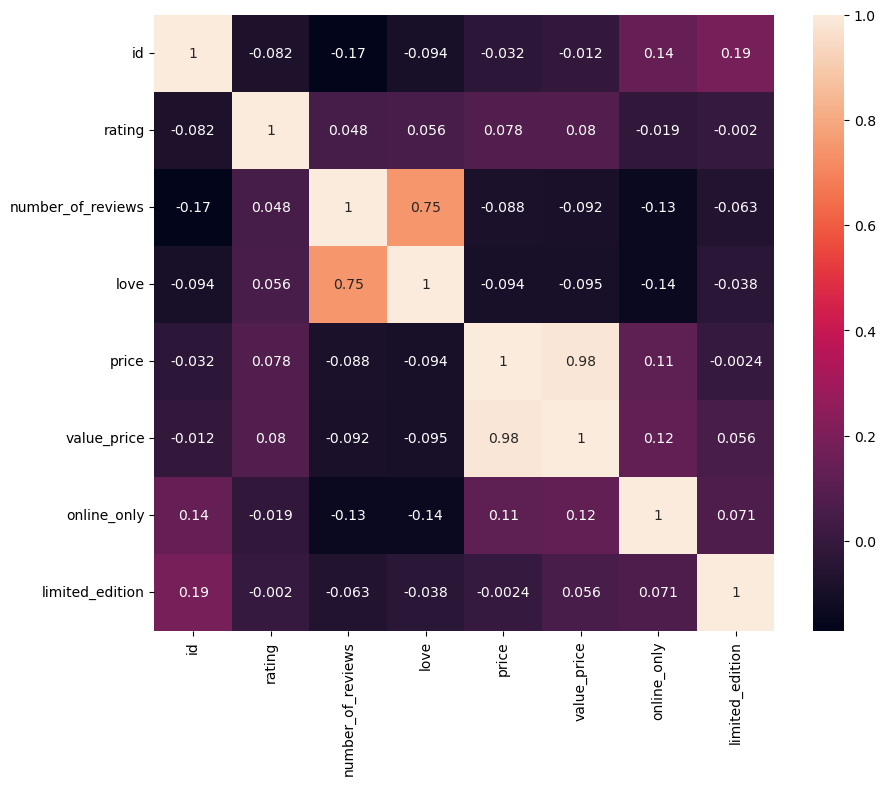

In [212]:
# Ma trận tương quan
plt.figure(figsize=(10,8))
sns.heatmap(data_numeric.corr(),annot=True)

# 1. Các thương hiệu mỹ phẩm chiếm lĩnh thị trường

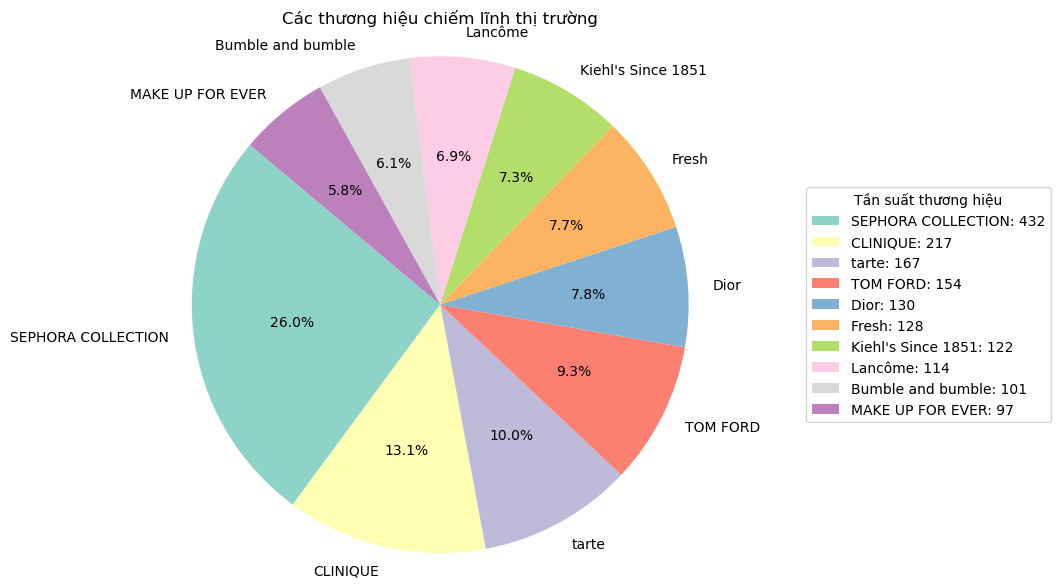

In [213]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Giả sử bạn có data_hc và tính toán tần suất thương hiệu
brand_counts = data_hc['brand'].value_counts()
top_brands = brand_counts.head(10)

# Tạo biểu đồ tròn
fig, ax = plt.subplots(figsize=(10, 6))  # Kích thước lớn hơn để chứa chú thích
colors = sns.color_palette('Set3', len(top_brands))  # Màu sắc

# Vẽ biểu đồ tròn
wedges, texts, autotexts = ax.pie(
    top_brands, 
    labels=top_brands.index, 
    autopct='%1.1f%%', 
    startangle=140, 
    colors=colors,
)

# Đặt tiêu đề
plt.title('Các thương hiệu chiếm lĩnh thị trường')

# Đảm bảo biểu đồ tròn không bị méo
plt.axis('equal')

# Thêm bảng chú thích kế bên biểu đồ
legend_labels = [f'{label}: {value}' for label, value in zip(top_brands.index, top_brands.values)]
plt.legend(wedges, legend_labels, title='Tần suất thương hiệu', loc='center left', bbox_to_anchor=(1, 0.5))

# Hiển thị biểu đồ
plt.tight_layout()  # Đảm bảo không bị tràn ra ngoài
plt.show()



# 2.Các thương hiệu phố biến hiện nay 

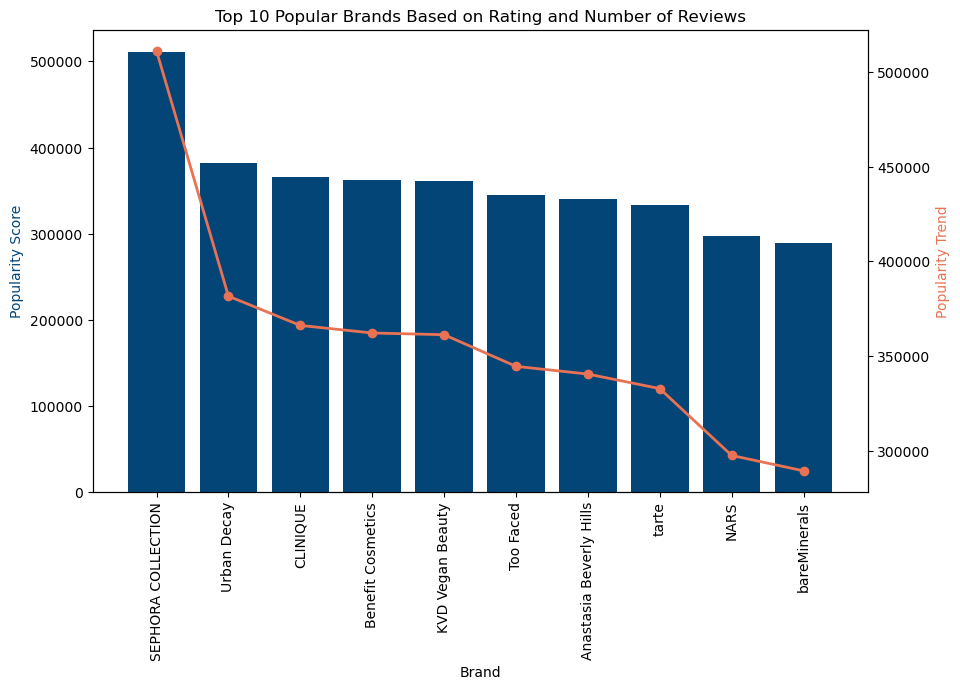

In [214]:
data_hc['popularity_score'] = data_hc['rating'] * data_hc['number_of_reviews']

# Nhóm theo thương hiệu và tính tổng popularity score
brand_popularity = data_hc.groupby('brand')['popularity_score'].sum().reset_index()

# Sắp xếp các thương hiệu theo điểm phổ biến từ cao đến thấp
brand_popularity_sorted = brand_popularity.sort_values(by='popularity_score', ascending=False)

# Lấy top N thương hiệu để vẽ biểu đồ
top_n = 10
top_brands = brand_popularity_sorted.head(top_n)

# Vẽ biểu đồ cột và biểu đồ đường cùng một lúc
fig, ax1 = plt.subplots(figsize=(10, 6))

# Biểu đồ cột
ax1.bar(top_brands['brand'], top_brands['popularity_score'], color='#034577', label='Popularity Score')

# Tạo trục y thứ hai cho biểu đồ đường
ax2 = ax1.twinx()

# Biểu đồ đường
ax2.plot(top_brands['brand'], top_brands['popularity_score'], color='#E97254', marker='o', label='Popularity Trend', linestyle='-', linewidth=2)

# Thêm nhãn và tiêu đề
ax1.set_xlabel('Brand')
ax1.set_ylabel('Popularity Score', color='#034577')
ax2.set_ylabel('Popularity Trend', color='#E97254')
plt.title('Top 10 Popular Brands Based on Rating and Number of Reviews')
ax1.tick_params(axis='x', rotation=90)

# Hiển thị biểu đồ
#plt.tight_layout()
plt.show()

# 3.Các sản phẩm nào có giá trị tốt nhất so với giá cả (value_price)

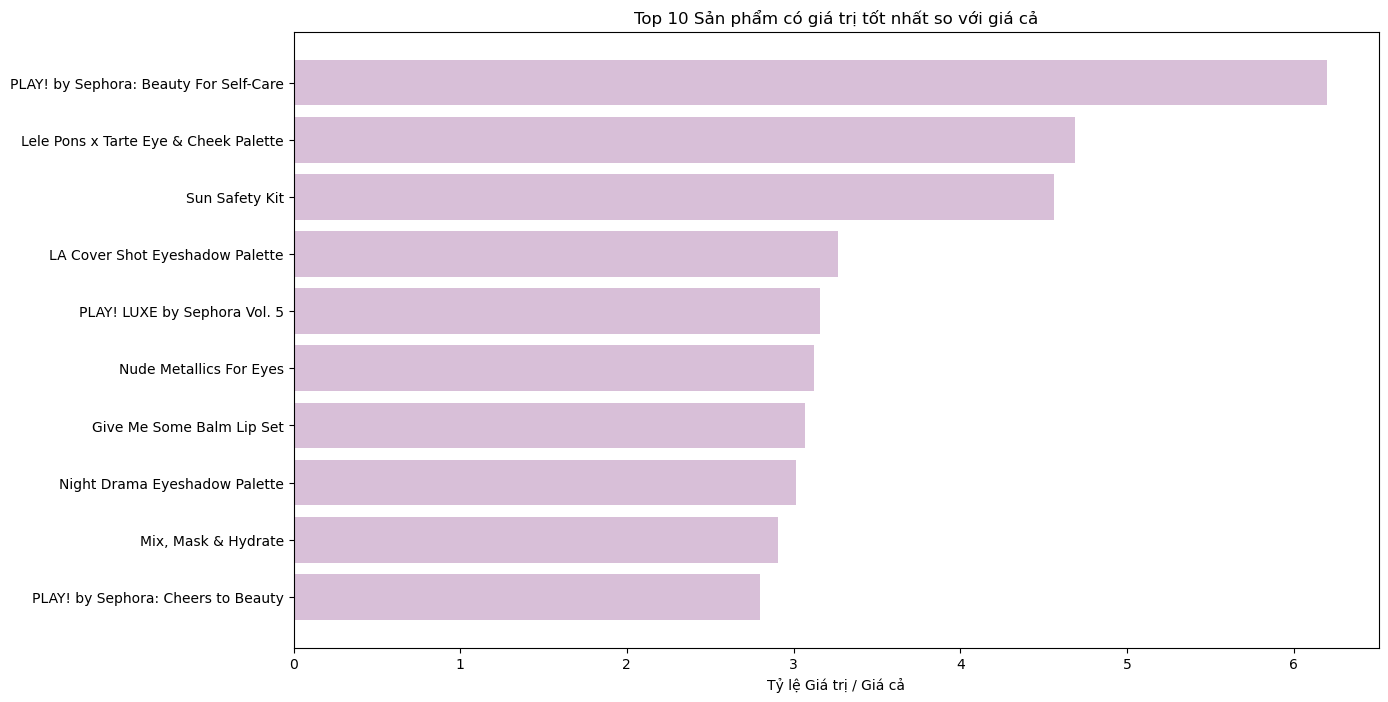

name  price  value_price  value_ratio
6292  PLAY! by Sephora: Beauty For Self-Care     10         62.0     6.200000
7585   Lele Pons x Tarte Eye & Cheek Palette     35        164.0     4.685714
6904                          Sun Safety Kit     39        178.0     4.564103
7191         LA Cover Shot Eyeshadow Palette     45        147.0     3.266667
6294            PLAY! LUXE by Sephora Vol. 5     25         79.0     3.160000
5701                 Nude Metallics For Eyes     25         78.0     3.120000
6905               Give Me Some Balm Lip Set     29         89.0     3.068966
903            Night Drama Eyeshadow Palette     59        178.0     3.016949
6111                     Mix, Mask & Hydrate     75        218.0     2.906667
6293      PLAY! by Sephora: Cheers to Beauty     10         28.0     2.800000

In [215]:
# Các sản phẩm nào có giá trị tốt nhất so với giá cả (value _price)?
# Trực quan hóa: Biểu đồ cột so sánh giá trị của các sản phẩm với giá cả.
import matplotlib.pyplot as plt
# Tính tỷ lệ giữa giá trị và giá cả
data_hc['value_ratio'] = data_hc['value_price'] / data_hc['price']

# Lọc các sản phẩm có giá cả hợp lý (tránh chia cho 0) và sắp xếp giảm dần theo tỷ lệ
top_products = data_hc[data_hc['price'] > 0].nlargest(10, 'value_ratio')[['name', 'price', 'value_price', 'value_ratio']]

# Trực quan hóa biểu đồ cột
plt.figure(figsize=(14, 8))
plt.barh(top_products['name'], top_products['value_ratio'], color='thistle')
plt.xlabel('Tỷ lệ Giá trị / Giá cả')
plt.title('Top 10 Sản phẩm có giá trị tốt nhất so với giá cả')
plt.gca().invert_yaxis()
plt.show()

# Hiển thị bảng dữ liệu liên quan
top_products


# 4.Top 10 Thành Phần Xuất Hiện Nhiều Nhất?

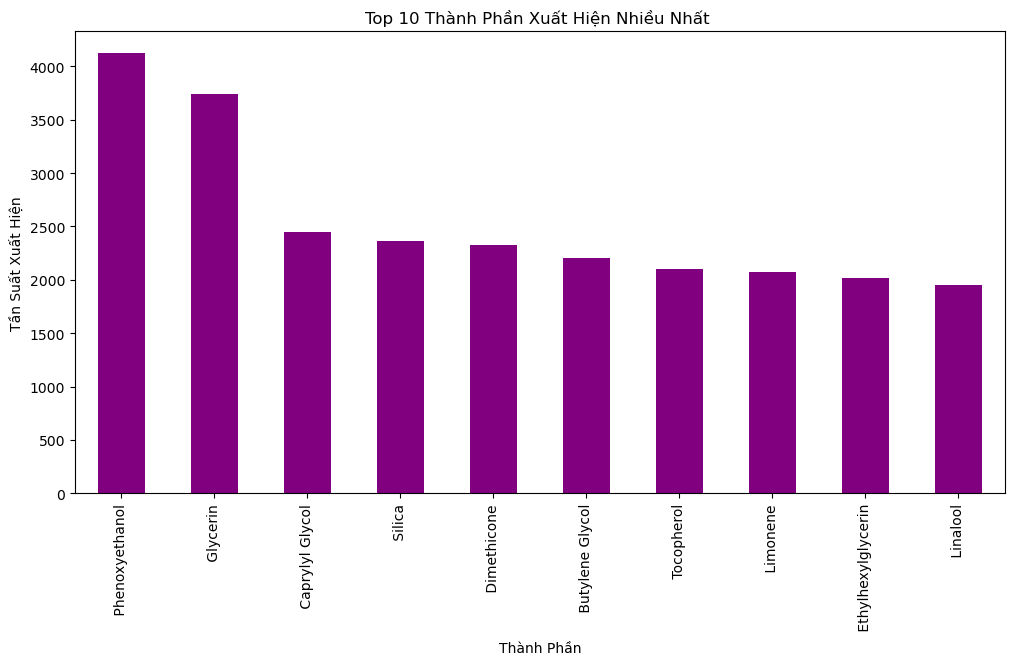

In [216]:
df = pd.DataFrame(data_hc) 
# Tách các thành phần và tính tần suất xuất hiện 
all_ingredients = ' '.join(df['ingredients']).split('-') 
ingredient_counts = pd.Series(all_ingredients).value_counts() 
# Lấy top 10 thành phần xuất hiện nhiều nhất 
top_10_ingredients = ingredient_counts.head(10) 
# Vẽ biểu đồ cột 
plt.figure(figsize=(12, 6)) 
top_10_ingredients.plot(kind='bar', color='purple') 
plt.title('Top 10 Thành Phần Xuất Hiện Nhiều Nhất ') 
plt.xlabel('Thành Phần') 
plt.ylabel('Tần Suất Xuất Hiện') 
plt.xticks(rotation=90) 
plt.show()

# 5.Top 5 thương hiệu thường xuyên có xếp hạng thấp nhất

In [217]:
# Lọc các sản phẩm có rating = 1.0
lowest_rank_brands = data_hc.loc[data_hc['rating'] == 1.0]

# Nhóm theo thương hiệu và đếm số lượng sản phẩm có rating 1.0
brand_counts = lowest_rank_brands.groupby('brand').size()

# Chọn 5 thương hiệu có số lượng sản phẩm rating 1.0 cao nhất
top_5_lowest_rated_brands = brand_counts.nlargest(5)

top_5_lowest_rated_brands

brand
Capri Blue       2
Moroccanoil      2
BVLGARI          1
By Rosie Jane    1
COOLA            1
dtype: int64

## Biểu diễn bằng Bar chart

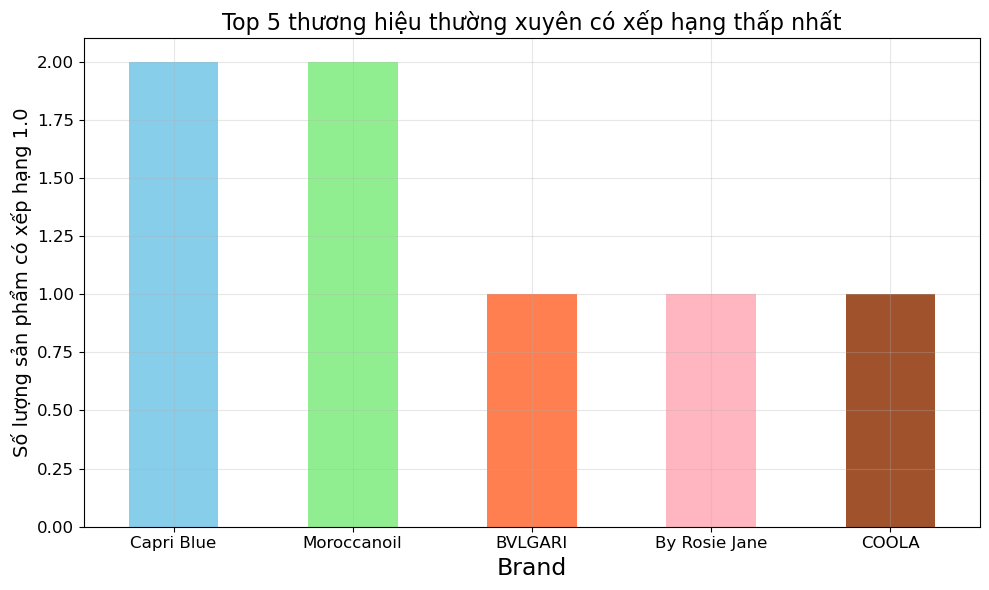

In [218]:
# Vẽ biểu đồ bar chart
plt.figure(figsize=(10, 6))
top_5_lowest_rated_brands.plot(kind='bar', color=['skyblue', 'lightgreen', 'coral', 'lightpink', 'sienna'])

# Tùy chỉnh biểu đồ
plt.title("Top 5 thương hiệu thường xuyên có xếp hạng thấp nhất", fontsize=16)
plt.xlabel("Brand", fontsize=17)
plt.ylabel("Số lượng sản phẩm có xếp hạng 1.0", fontsize=14)
plt.xticks(rotation=0, ha='center', fontsize=12)
plt.yticks(fontsize=12)
plt.grid(True, alpha=0.3)

# Hiển thị biểu đồ
plt.tight_layout()
plt.show()


# 6.Mối quan hệ giữa thương hiệu và đánh giá

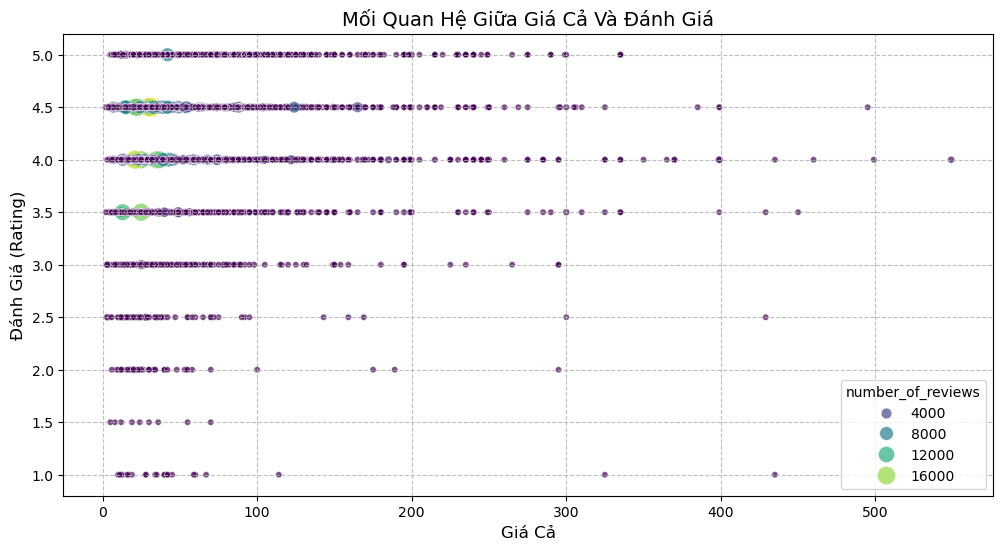

In [219]:
import matplotlib.pyplot as plt
import seaborn as sns

# Vẽ biểu đồ phân tán
plt.figure(figsize=(12, 6))
sns.scatterplot(x='price', y='rating', data=data_hc,
                size='number_of_reviews', sizes=(20, 200), 
                hue='number_of_reviews', palette='viridis', alpha=0.7)

# Thêm tiêu đề và nhãn
plt.title('Mối Quan Hệ Giữa Giá Cả Và Đánh Giá', fontsize=14)
plt.xlabel('Giá Cả', fontsize=12)
plt.ylabel('Đánh Giá (Rating)', fontsize=12)

plt.grid(True, linestyle='--', alpha=0.8)
plt.show()

Ta có thể thấy đang đc ưa chuộng dưỡng ẩm

# 7.Sự phân bổ rating của các sản phẩm trong từng danh mục (category)

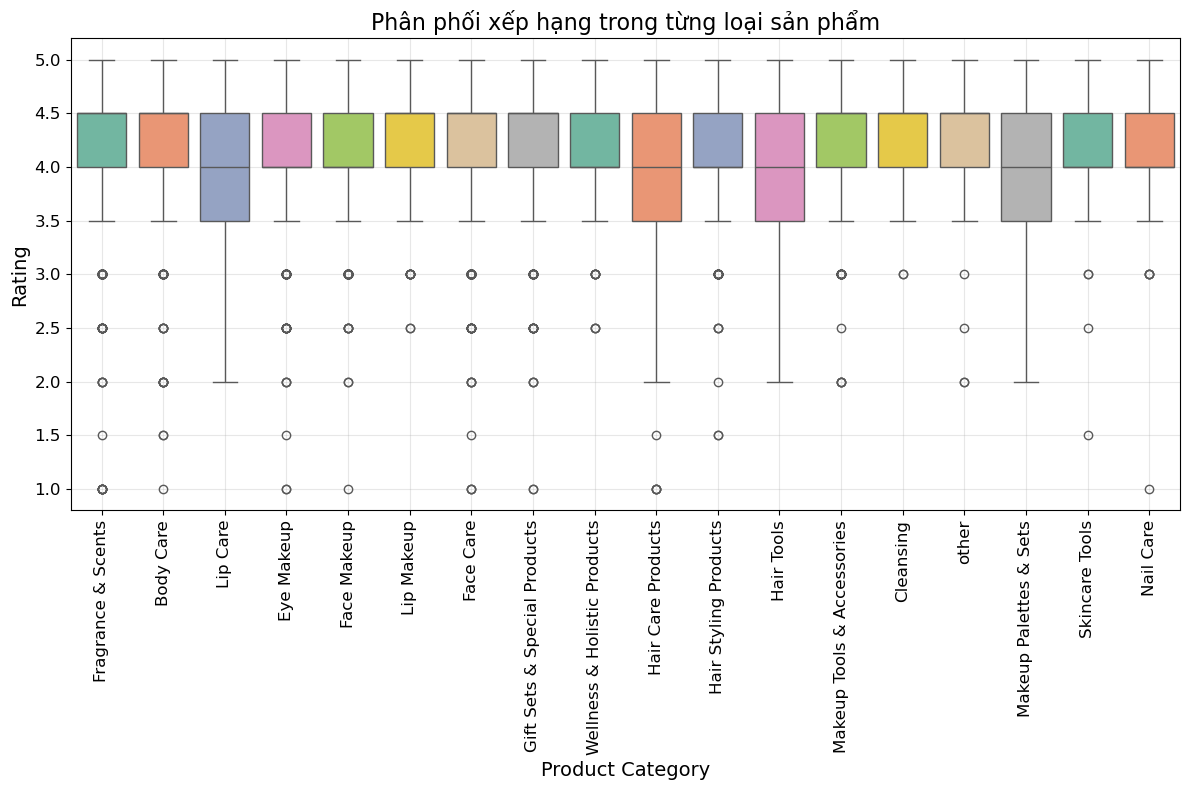

In [220]:
# Tạo biểu đồ boxplot với sửa lỗi FutureWarning
plt.figure(figsize=(12, 8))
sns.boxplot(x='category', y='rating', data=data_hc, hue='category', palette='Set2')

# Tùy chỉnh biểu đồ
plt.title("Phân phối xếp hạng trong từng loại sản phẩm", fontsize=16)
plt.xlabel("Product Category", fontsize=14)
plt.ylabel("Rating", fontsize=14)
plt.xticks(rotation=90, ha='center', fontsize=12)
plt.yticks(fontsize=12)
plt.grid(True, alpha=0.3)

# Hiển thị biểu đồ
plt.tight_layout()
plt.show()

In [221]:
import pandas as pd
from wordcloud import WordCloud
import matplotlib.pyplot as plt

# Kiểm tra dữ liệu
print(data_hc.head())

        id           brand            category                            name  rating  number_of_reviews    love  price  value_price  \
0  2218774  Acqua Di Parma  Fragrance & Scents  Blu Mediterraneo MINIATURE Set     4.0                4.0  3002.0     66         75.0   
1  2044816  Acqua Di Parma  Fragrance & Scents                         Colonia     4.5               76.0  2700.0     66         66.0   
2  1417567  Acqua Di Parma  Fragrance & Scents                Arancia di Capri     4.5               26.0  2600.0    180        180.0   
3  1417617  Acqua Di Parma  Fragrance & Scents                Mirto di Panarea     4.5               23.0  2900.0    120        120.0   
4  2218766  Acqua Di Parma  Fragrance & Scents           Colonia Miniature Set     3.5                2.0   943.0     72         80.0   

                                             options                                        ingredients  online_only  limited_edition  \
0                                       

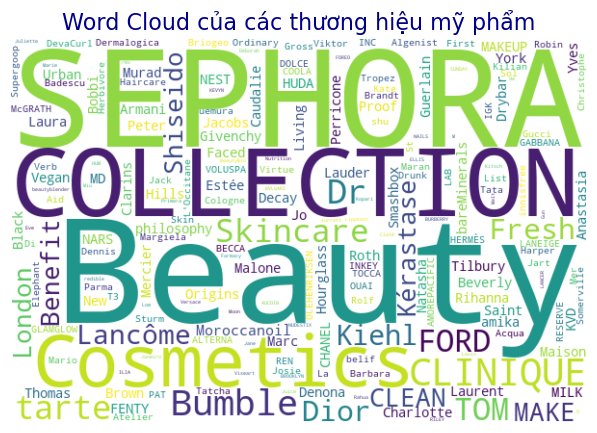

In [222]:
# Tạo chuỗi chứa tất cả các thương hiệu (Brand)
brand_text = " ".join(brand for brand in data_hc['brand'] if pd.notnull(brand))

# Tạo Word Cloud
wordcloud = WordCloud(
    width=600, 
    height=400, 
    background_color='white', 
    colormap='viridis', 
    collocations=False
).generate(brand_text)

# Vẽ Word Cloud
plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.title("Word Cloud của các thương hiệu mỹ phẩm", fontsize=16, color='darkblue')
plt.show()

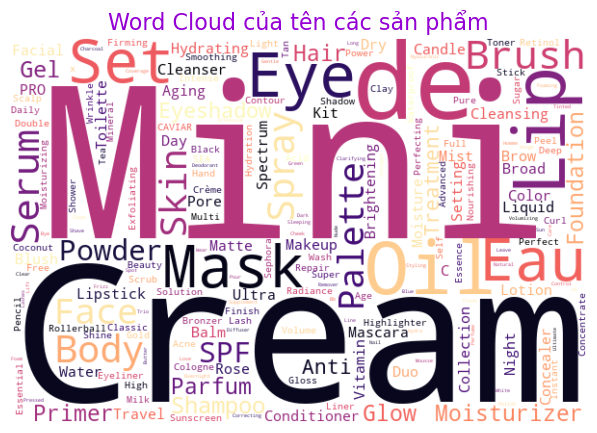

In [223]:
# Tạo chuỗi chứa tất cả tên sản phẩm (Product)
product_text = " ".join(product for product in data_hc['name'] if pd.notnull(product))

colormap_list = ['magma']

for cmap in colormap_list:
    wordcloud = WordCloud(
        width=600, 
        height=400, 
        background_color='white', 
        colormap=cmap, 
        collocations=False
    ).generate(product_text)

    plt.figure(figsize=(10, 5))
    plt.imshow(wordcloud, interpolation='bilinear')
    plt.axis("off")
    plt.title("Word Cloud của tên các sản phẩm", fontsize=16, color='#9400D3')
    plt.show()

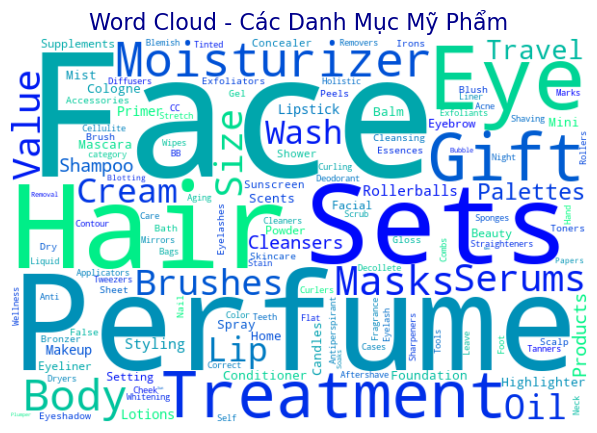

In [224]:
data_hc = pd.read_csv("D:\\SEPHORA\\sephora_website_dataset.csv")
# Tạo chuỗi chứa tất cả các danh mục (Category)
category_text = " ".join(category for category in data_hc['category'] if pd.notnull(category))

# Tạo Word Cloud với màu sắc từ colormap khác
wordcloud_category = WordCloud(
    width=600,
    height=400,
    background_color='white',
    colormap='winter',  # Sử dụng dải màu khác
    collocations=False
).generate(category_text)

# Vẽ Word Cloud
plt.figure(figsize=(10, 5))
plt.imshow(wordcloud_category, interpolation='bilinear')
plt.axis("off")
plt.title("Word Cloud - Các Danh Mục Mỹ Phẩm", fontsize=16, color='darkblue')
plt.show()

# P4 DỰ ĐOÁN

In [225]:
#Sử dụng dataframe hoàn chỉnh
data_hc = pd.read_csv("D:\\SEPHORA\\Sephora_New.csv")
data_hc.head()

id           brand   category                            name  rating  number_of_reviews    love  price  value_price  \
0  2218774  Acqua Di Parma  Fragrance  Blu Mediterraneo MINIATURE Set     4.0                4.0  3002.0     66         75.0   
1  2044816  Acqua Di Parma    Cologne                         Colonia     4.5               76.0  2700.0     66         66.0   
2  1417567  Acqua Di Parma    Perfume                Arancia di Capri     4.5               26.0  2600.0    180        180.0   
3  1417617  Acqua Di Parma    Perfume                Mirto di Panarea     4.5               23.0  2900.0    120        120.0   
4  2218766  Acqua Di Parma  Fragrance           Colonia Miniature Set     3.5                2.0   943.0     72         80.0   

                                             options                                        ingredients  online_only  limited_edition  
0                                         no options  Arancia di Capri Eau de Toilette Alcohol Denat...            1                0  
1   - 0.7 oz/ 20 mL  Spray  - 1.7 oz/ 50 mL Eau d...                                            unknown            1                0  
2   - 1oz/30mL Eau de Toilette  - 2.5 oz/ 74 mL E...  Alcohol Denat- Water- Fragrance- Limonene- Lin...            1                0  
3   - 1 oz/ 30 mL Eau de Toilette Spray - 2.5 oz/...                                            unknown            1                0  
4                                         no options  Colonia Alcohol Denat- Water- Fragrance- Limon...            1                0

# a) k-Means (MÔ HÌNH MÁY HỌC KHÔNG GIÁM SÁT)

# Chuẩn bị dữ liệu

In [226]:
data_filtered = data_hc[['number_of_reviews', 'rating']].dropna()
data_filtered.columns = ['number_of_reviews', 'rating']
data_filtered.head(len(data_hc))

number_of_reviews  rating
0                   4.0     4.0
1                  76.0     4.5
2                  26.0     4.5
3                  23.0     4.5
4                   2.0     3.5
5                  79.0     4.5
6                  79.0     4.5
7                  13.0     5.0
8                   5.0     4.0
9                   5.0     3.0
10                  3.0     3.5
11                 16.0     4.5
12                 19.0     4.5
13                 44.0     4.5
14                  1.0     4.0
15                  6.0     4.5
16                  2.0     3.0
17                  7.0     3.5
18                 20.0     4.0
19                  1.0     5.0
20                  1.0     5.0
21                  5.0     4.5
22                  2.0     3.0
23                 34.0     4.5
24                  1.0     4.0
25                  2.0     5.0
26                  1.0     5.0
27                  5.0     4.0
28                  2.0     4.0
29                 91.0     4.0
30                 77.0     4.5
31                 12.0     5.0
32                 63.0     4.5
33                 32.0     4.5
34                 39.0     4.5
35                  2.0     5.0
36                 33.0     3.5
37                 48.0     4.5
38                 33.0     4.5
39                 17.0     4.0
40                386.0     4.5
41                 52.0     4.5
42                 12.0     4.5
43                 11.0     4.0
44                 23.0     4.5
45                  9.0     4.5
46                  4.0     5.0
47                  3.0     4.5
48                  3.0     4.0
49                 14.0     4.0
50                116.0     5.0
51                170.0     5.0
52                 59.0     5.0
53                 18.0     5.0
54                 54.0     5.0
55                 35.0     5.0
56                656.0     4.0
57               1000.0     4.5
58                 38.0     4.5
59                462.0     4.5
60                873.0     4.0
61                422.0     4.5
62                100.0     4.0
63                491.0     4.0
64                221.0     4.0
65                 63.0     4.5
66                215.0     4.5
67                234.0     4.5
68                184.0     4.5
69                 58.0     3.5
70                302.0     4.0
71                 73.0     4.0
72                  3.0     4.5
73                 24.0     4.5
74                 20.0     4.0
75                 21.0     4.5
76                 77.0     4.5
77                232.0     4.5
78                 67.0     4.5
79                 26.0     4.5
80                  2.0     4.5
81                 72.0     4.5
82                 14.0     4.0
83                 37.0     4.5
84                299.0     4.0
85                240.0     4.5
86                 83.0     4.5
87                 10.0     4.0
88                269.0     4.0
89                160.0     4.5
90                100.0     4.5
91                110.0     4.0
92                 65.0     4.5
93                179.0     4.5
94                 55.0     4.5
95                 39.0     4.0
96                 26.0     4.0
97                  5.0     5.0
98                 23.0     3.0
99                 54.0     3.5
100                 7.0     5.0
101                 4.0     5.0
102                 2.0     5.0
103                21.0     3.5
104                97.0     4.5
105                93.0     4.0
106                46.0     4.0
107               633.0     4.5
108                17.0     3.5
109                 5.0     5.0
110                10.0     5.0
111                 3.0     5.0
112                 7.0     4.5
113                 3.0     5.0
114                 3.0     5.0
115                 9.0     4.0
116                 3.0     3.5
117                 6.0     4.5
118                 3.0     4.5
119                 6.0     3.5
120               124.0     4.5
121                57.0     4.5
122                67.0     4.5
123                74.0     4.5
124   

# Silhouette Score

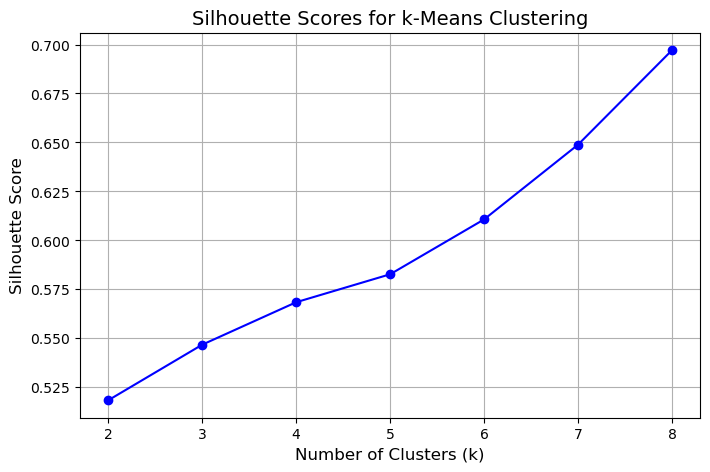

[0.5184207255577804,
 0.5467859130809798,
 0.5684529538986596,
 0.5827198230441557,
 0.6107252843726705,
 0.6488703968756484,
 0.6970857143792605]

In [227]:
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
from sklearn.preprocessing import StandardScaler

# Select the columns 'rating' and 'number_of_reviews' for clustering
clustering_data = data_hc[['rating', 'number_of_reviews']]

# Standardize the data for better clustering performance
scaler = StandardScaler()
clustering_data_scaled = scaler.fit_transform(clustering_data)

# Calculate Silhouette Scores for different numbers of clusters
silhouette_scores = []
cluster_range = range(2, 9)  # From 2 to 8 clusters

for n_clusters in cluster_range:
    kmeans = KMeans(n_clusters=n_clusters, random_state=42)
    cluster_labels = kmeans.fit_predict(clustering_data_scaled)
    score = silhouette_score(clustering_data_scaled, cluster_labels)
    silhouette_scores.append(score)

# Plot the Silhouette Scores
plt.figure(figsize=(8, 5))
plt.plot(cluster_range, silhouette_scores, marker='o', linestyle='-', color='b')
plt.title('Silhouette Scores for k-Means Clustering', fontsize=14)
plt.xlabel('Number of Clusters (k)', fontsize=12)
plt.ylabel('Silhouette Score', fontsize=12)
plt.grid(True)
plt.xticks(cluster_range)
plt.show()

silhouette_scores

# Biểu đồ K-Means

      number_of_reviews  rating
0                   4.0     4.0
1                  76.0     4.5
2                  26.0     4.5
3                  23.0     4.5
4                   2.0     3.5
5                  79.0     4.5
6                  79.0     4.5
7                  13.0     5.0
8                   5.0     4.0
9                   5.0     3.0
10                  3.0     3.5
11                 16.0     4.5
12                 19.0     4.5
13                 44.0     4.5
14                  1.0     4.0
15                  6.0     4.5
16                  2.0     3.0
17                  7.0     3.5
18                 20.0     4.0
19                  1.0     5.0
20                  1.0     5.0
21                  5.0     4.5
22                  2.0     3.0
23                 34.0     4.5
24                  1.0     4.0
25                  2.0     5.0
26                  1.0     5.0
27                  5.0     4.0
28                  2.0     4.0
29                 91.0     4.0
30      

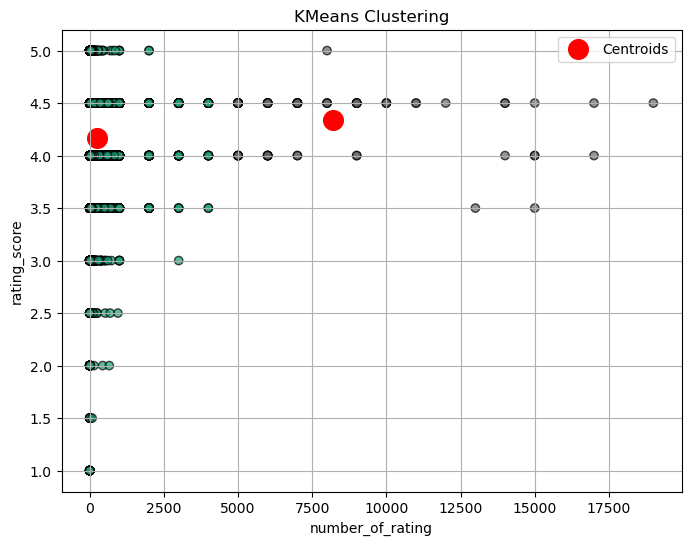

number_of_reviews  rating  hot
0                   4.0     4.0    0
1                  76.0     4.5    0
2                  26.0     4.5    0
3                  23.0     4.5    0
4                   2.0     3.5    0
5                  79.0     4.5    0
6                  79.0     4.5    0
7                  13.0     5.0    0
8                   5.0     4.0    0
9                   5.0     3.0    0
10                  3.0     3.5    0
11                 16.0     4.5    0
12                 19.0     4.5    0
13                 44.0     4.5    0
14                  1.0     4.0    0
15                  6.0     4.5    0
16                  2.0     3.0    0
17                  7.0     3.5    0
18                 20.0     4.0    0
19                  1.0     5.0    0
20                  1.0     5.0    0
21                  5.0     4.5    0
22                  2.0     3.0    0
23                 34.0     4.5    0
24                  1.0     4.0    0
25                  2.0     5.0    0
26                  1.0     5.0    0
27                  5.0     4.0    0
28                  2.0     4.0    0
29                 91.0     4.0    0
30                 77.0     4.5    0
31                 12.0     5.0    0
32                 63.0     4.5    0
33                 32.0     4.5    0
34                 39.0     4.5    0
35                  2.0     5.0    0
36                 33.0     3.5    0
37                 48.0     4.5    0
38                 33.0     4.5    0
39                 17.0     4.0    0
40                386.0     4.5    0
41                 52.0     4.5    0
42                 12.0     4.5    0
43                 11.0     4.0    0
44                 23.0     4.5    0
45                  9.0     4.5    0
46                  4.0     5.0    0
47                  3.0     4.5    0
48                  3.0     4.0    0
49                 14.0     4.0    0
50                116.0     5.0    0
51                170.0     5.0    0
52                 59.0     5.0    0
53                 18.0     5.0    0
54                 54.0     5.0    0
55                 35.0     5.0    0
56                656.0     4.0    0
57               1000.0     4.5    0
58                 38.0     4.5    0
59                462.0     4.5    0
60                873.0     4.0    0
61                422.0     4.5    0
62                100.0     4.0    0
63                491.0     4.0    0
64                221.0     4.0    0
65                 63.0     4.5    0
66                215.0     4.5    0
67                234.0     4.5    0
68                184.0     4.5    0
69                 58.0     3.5    0
70                302.0     4.0    0
71                 73.0     4.0    0
72                  3.0     4.5    0
73                 24.0     4.5    0
74                 20.0     4.0    0
75                 21.0     4.5    0
76                 77.0     4.5    0
77                232.0     4.5    0
78                 67.0     4.5    0
79                 26.0     4.5    0
80                  2.0     4.5    0
81                 72.0     4.5    0
82                 14.0     4.0    0
83                 37.0     4.5    0
84                299.0     4.0    0
85                240.0     4.5    0
86                 83.0     4.5    0
87                 10.0     4.0    0
88                269.0     4.0    0
89                160.0     4.5    0
90                100.0     4.5    0
91                110.0     4.0    0
92                 65.0     4.5    0
93                179.0     4.5    0
94                 55.0     4.5    0
95                 39.0     4.0    0
96                 26.0     4.0    0
97                  5.0     5.0    0
98                 23.0     3.0    0
99                 54.0     3.5    0
100                 7.0     5.0    0
101                 4.0     5.0    0
102                 2.0     5.0    0
103                21.0     3.5    0
104                97.0     4.5    0
105                93.0     4.0    0
106                46.0     4.0    0
107       

In [229]:
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
import numpy as np

# Chọn các cột cần thiết: 'number_of_reviews' và 'rating'
# Loại bỏ các giá trị null (nếu có)
data_filtered = data_hc[['number_of_reviews', 'rating']].dropna()
data_filtered.columns = ['number_of_reviews', 'rating']
print(data_filtered.head(len(data_hc)))
# Chuẩn bị dữ liệu cho mô hình
X = data_filtered[['number_of_reviews', 'rating']].values

# Áp dụng mô hình KMeans với 2 cụm
kmeans = KMeans(n_clusters=2, random_state=0)
clusters = kmeans.fit_predict(X)

# Tính Silhouette Score trung bình
silhouette_avg = silhouette_score(X, clusters)
print(f"Silhouette Score trung bình: {silhouette_avg:.4f}")

# Thêm nhãn cụm vào dataframe
data_filtered['hot'] = clusters

# Vẽ biểu đồ scatter thể hiện phân cụm với màu sắc khác nhau cho từng cụm 
plt.figure(figsize=(8, 6)) 
plt.scatter(
    data_filtered['number_of_reviews'],
    data_filtered['rating'],
    c=clusters, # Sử dụng các nhãn cụm để thiết lập màu sắc
    cmap='Dark2', # Thiết lập bảng màu Dark2
    alpha=0.7,
    edgecolors='k'
)
# Vẽ trung tâm cụm
centers = kmeans.cluster_centers_
plt.scatter(centers[:, 0], centers[:, 1], c='red', s=200, marker='o', label='Centroids')
plt.title("KMeans Clustering")
plt.xlabel("number_of_rating")
plt.ylabel("rating_score")
plt.legend()
plt.grid(True)
plt.show()

# Hiển thị kết quả đầu ra
data_filtered.head(8613)

# b) K-Nearest Neighbor

      Predictions
0               0
1               0
2               0
3               0
4               0
5               0
6               0
7               0
8               0
9               0
10              0
11              0
12              0
13              0
14              0
15              0
16              0
17              0
18              0
19              0
20              0
21              0
22              0
23              0
24              0
25              0
26              0
27              0
28              0
29              1
30              0
31              0
32              0
33              0
34              0
35              0
36              0
37              0
38              0
39              0
40              0
41              0
42              0
43              0
44              0
45              0
46              0
47              0
48              0
49              0
50              0
51              1
52              0
53              0
54        

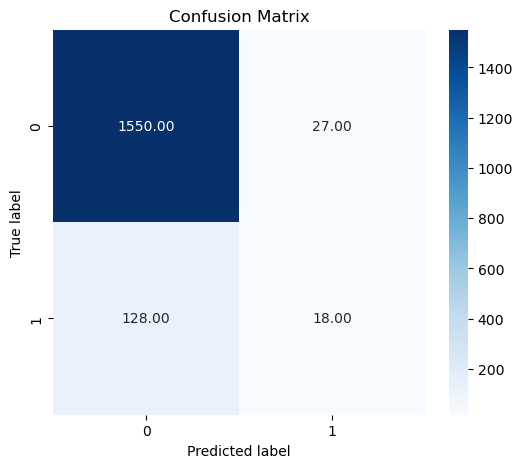

Classification Report:
              precision    recall  f1-score   support

           0       0.92      0.98      0.95      1577
           1       0.40      0.12      0.19       146

    accuracy                           0.91      1723
   macro avg       0.66      0.55      0.57      1723
weighted avg       0.88      0.91      0.89      1723



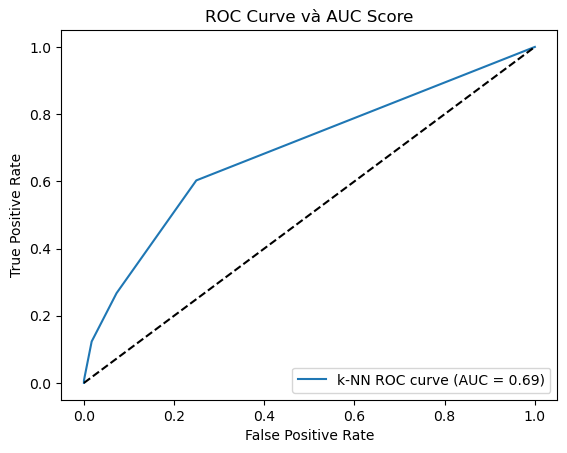

Accuracy: 0.910040626813697


In [231]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import confusion_matrix, classification_report, roc_curve, auc
from sklearn.preprocessing import LabelEncoder
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

# 2. Xử lý dữ liệu
# Chuyển đổi các cột dạng chuỗi thành số
label_encoders = {}
for column in data_hc.columns:
    if data_hc[column].dtype == 'object':  # Kiểm tra kiểu dữ liệu
        le = LabelEncoder()
        data_hc[column] = le.fit_transform(data_hc[column])  # Mã hóa cột
        label_encoders[column] = le

# Giả sử cột cuối là nhãn, bạn có thể thay đổi nếu cần
X = data_hc.iloc[:, :-1]  # Các feature
y = data_hc.iloc[:, -1]   # Nhãn (label)

# Chia dữ liệu thành tập train và test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# 3. Xây dựng mô hình KNN
knn = KNeighborsClassifier(n_neighbors=5)  # K=5, bạn có thể điều chỉnh
knn.fit(X_train, y_train)

# 4. Dự đoán và đánh giá
y_pred = knn.predict(X_test)

# 4. Dự đoán và tạo bảng kết quả
y_pred = knn.predict(X_test)  # Thực hiện dự đoán
predictions_df = pd.DataFrame(y_pred, columns=['Predictions'])  # Lưu kết quả dự đoán vào DataFrame
print(predictions_df)

# 5. Tạo Confusion Matrix
cm = confusion_matrix(y_test, y_pred)

# Hiển thị Confusion Matrix với nhãn
labels = ['Positive (1)', 'Negative (0)']
confusion_df = pd.DataFrame(cm, index=labels, columns=labels)
print("\nConfusion Matrix:")
print(confusion_df)

# 6. Đánh giá chi tiết với Classification Report
report = classification_report(y_test, y_pred, target_names=labels)
print("\nClassification Report:")
print(report)

# Accuracy
accuracy = knn.score(X_test, y_test)
print(f"Accuracy: {accuracy}")

# Confusion Matrix
conf_matrix = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(6, 5))
sns.heatmap(conf_matrix, annot=True, fmt=".2f", cmap="Blues", xticklabels=np.unique(y), yticklabels=np.unique(y))
plt.title("Confusion Matrix")
plt.xlabel("Predicted label")
plt.ylabel("True label")
plt.show()

# Classification Report
print("Classification Report:")
print(classification_report(y_test, y_pred))

# ROC Curve (nếu dữ liệu là nhị phân)
if len(np.unique(y)) == 2:  # Chỉ áp dụng nếu có 2 lớp
    y_prob = knn.predict_proba(X_test)[:, 1]  # Xác suất của lớp Positive
    fpr, tpr, thresholds = roc_curve(y_test, y_prob)
    roc_auc = auc(fpr, tpr)

    plt.figure()
    plt.plot(fpr, tpr, label=f'k-NN ROC curve (AUC = {roc_auc:.2f})')
    plt.plot([0, 1], [0, 1], 'k--')  # Đường chéo
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('ROC Curve và AUC Score')
    plt.legend(loc="lower right")
    plt.show()

# Accuracy
accuracy = knn.score(X_test, y_test)
print(f"Accuracy: {accuracy}")

# c) Logistic Regression

      Predictions
0               1
1               1
2               1
3               0
4               1
5               0
6               0
7               1
8               1
9               0
10              0
11              1
12              1
13              1
14              1
15              1
16              1
17              1
18              1
19              1
20              1
21              1
22              0
23              0
24              1
25              1
26              0
27              1
28              1
29              1
30              0
31              1
32              1
33              1
34              0
35              1
36              1
37              1
38              1
39              1
40              1
41              1
42              1
43              1
44              1
45              1
46              1
47              0
48              0
49              1
50              1
51              1
52              1
53              1
54        

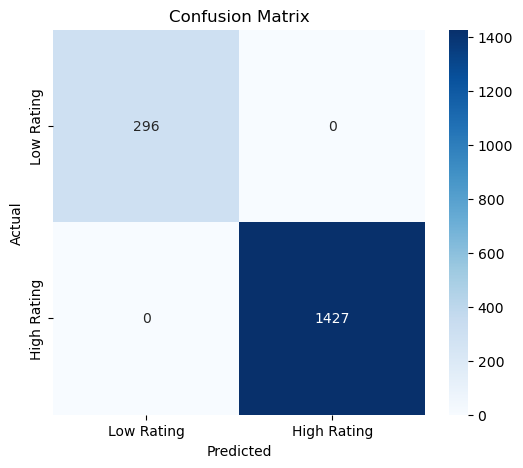

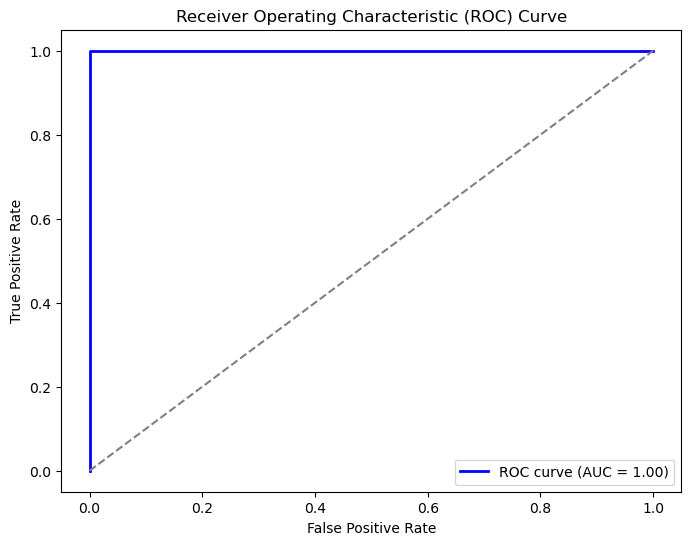

In [233]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import (
    confusion_matrix,
    classification_report,
    roc_curve,
    auc,
    accuracy_score,
    precision_score,
    recall_score,
    f1_score
)
from sklearn.preprocessing import StandardScaler, LabelEncoder
import matplotlib.pyplot as plt
import seaborn as sns

# 1. Xử lý dữ liệu
label_encoders = {}
for column in data_hc.columns:
    if data_hc[column].dtype == 'object':  # Kiểm tra kiểu dữ liệu
        le = LabelEncoder()
        data_hc[column] = le.fit_transform(data_hc[column])  # Mã hóa cột
        label_encoders[column] = le

# Define a binary target based on rating (e.g., high rating if >=4.0)
data_hc['high_rating'] = (data_hc['rating'] >= 4.0).astype(int)

# Select features and target variable
X = data_hc[['number_of_reviews', 'rating']]
y = data_hc['high_rating']

# Handle missing values (if any)
X = X.fillna(X.mean())

# 2. Chia dữ liệu thành tập train và test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)
predictions_df = pd.DataFrame(y_pred, columns=['Predictions'])  # Lưu kết quả dự đoán vào DataFrame
print(predictions_df)

# Chuẩn hóa dữ liệu
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# 3. Xây dựng mô hình Logistic Regression
logreg = LogisticRegression(max_iter=1000, class_weight='balanced')  # Sử dụng class_weight để giảm mất cân bằng
logreg.fit(X_train_scaled, y_train)

# 4. Dự đoán và đánh giá
y_pred = logreg.predict(X_test_scaled)
y_prob = logreg.predict_proba(X_test_scaled)[:, 1]

# Evaluation Metrics
cm = confusion_matrix(y_test, y_pred)
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred, zero_division=0)
recall = recall_score(y_test, y_pred, zero_division=0)
f1 = f1_score(y_test, y_pred, zero_division=0)
classification_rep = classification_report(y_test, y_pred, zero_division=0)

# Print metrics
print("Confusion Matrix:")
print(cm)
print("\nClassification Report:")
print(classification_rep)
print(f"Accuracy: {accuracy:.2f}")
print(f"Precision: {precision:.2f}")
print(f"Recall: {recall:.2f}")
print(f"F1 Score: {f1:.2f}")

# 5. Plot Confusion Matrix and ROC-AUC Curve
# Confusion Matrix Heatmap
plt.figure(figsize=(6, 5))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", xticklabels=["Low Rating", "High Rating"], yticklabels=["Low Rating", "High Rating"])
plt.title("Confusion Matrix")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()

# ROC Curve and AUC
fpr, tpr, thresholds = roc_curve(y_test, y_prob)
roc_auc = auc(fpr, tpr)

plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='blue', lw=2, label=f'ROC curve (AUC = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], color='gray', linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc="lower right")
plt.show()

# d) SO SÁNH

Logistic Regression Results:

Confusion Matrix:
[[ 296    0]
 [   0 1427]]

Classification Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00       296
           1       1.00      1.00      1.00      1427

    accuracy                           1.00      1723
   macro avg       1.00      1.00      1.00      1723
weighted avg       1.00      1.00      1.00      1723

k-NN Results:

Confusion Matrix:
[[ 253   43]
 [   0 1427]]

Classification Report:
              precision    recall  f1-score   support

           0       1.00      0.85      0.92       296
           1       0.97      1.00      0.99      1427

    accuracy                           0.98      1723
   macro avg       0.99      0.93      0.95      1723
weighted avg       0.98      0.98      0.97      1723



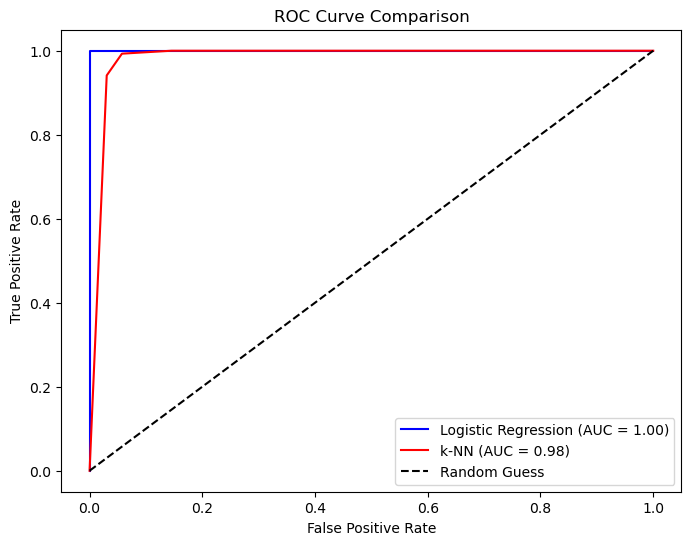

Accuracy Logistic Regression: 1.00
Accuracy k-NN: 0.98


In [234]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import confusion_matrix, classification_report, roc_curve, auc
from sklearn.preprocessing import StandardScaler, LabelEncoder
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

# 1. Xử lý dữ liệu
label_encoders = {}
for column in data_hc.columns:
    if data_hc[column].dtype == 'object':  # Kiểm tra kiểu dữ liệu
        le = LabelEncoder()
        data_hc[column] = le.fit_transform(data_hc[column])  # Mã hóa cột
        label_encoders[column] = le

# Giả sử cột cuối là nhãn
X = data_hc.iloc[:, :-1]  # Các feature
y = data_hc.iloc[:, -1]   # Nhãn (label)

# Chia dữ liệu thành tập train và test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

# Chuẩn hóa dữ liệu
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# 2. Logistic Regression
logreg = LogisticRegression(max_iter=2000, class_weight='balanced')
logreg.fit(X_train_scaled, y_train)
y_pred_logreg = logreg.predict(X_test_scaled)
y_prob_logreg = logreg.predict_proba(X_test_scaled)[:, 1]

# 3. K-Nearest Neighbors
knn = KNeighborsClassifier(n_neighbors=5)
knn.fit(X_train_scaled, y_train)
y_pred_knn = knn.predict(X_test_scaled)
y_prob_knn = knn.predict_proba(X_test_scaled)[:, 1]

# 4. Đánh giá và So sánh
# Logistic Regression metrics
print("Logistic Regression Results:")
print("\nConfusion Matrix:")
print(confusion_matrix(y_test, y_pred_logreg))
print("\nClassification Report:")
print(classification_report(y_test, y_pred_logreg))

# k-NN metrics
print("k-NN Results:")
print("\nConfusion Matrix:")
print(confusion_matrix(y_test, y_pred_knn))
print("\nClassification Report:")
print(classification_report(y_test, y_pred_knn))

# 5. Vẽ đường cong ROC cho cả hai mô hình
fpr_logreg, tpr_logreg, _ = roc_curve(y_test, y_prob_logreg)
roc_auc_logreg = auc(fpr_logreg, tpr_logreg)

fpr_knn, tpr_knn, _ = roc_curve(y_test, y_prob_knn)
roc_auc_knn = auc(fpr_knn, tpr_knn)

plt.figure(figsize=(8, 6))
plt.plot(fpr_logreg, tpr_logreg, label=f'Logistic Regression (AUC = {roc_auc_logreg:.2f})', color='blue')
plt.plot(fpr_knn, tpr_knn, label=f'k-NN (AUC = {roc_auc_knn:.2f})', color='red')
plt.plot([0, 1], [0, 1], 'k--', label="Random Guess")
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve Comparison')
plt.legend(loc="lower right")
plt.show()

# 6. Accuracy Comparison
accuracy_logreg = logreg.score(X_test_scaled, y_test)
accuracy_knn = knn.score(X_test_scaled, y_test)

print(f"Accuracy Logistic Regression: {accuracy_logreg:.2f}")
print(f"Accuracy k-NN: {accuracy_knn:.2f}")


                 Model  Accuracy  Precision    Recall  F1-score
0                  kNN   0.95473    0.94929  0.997868  0.972973
1  Logistic Regression   1.00000    1.00000  1.000000  1.000000


<Figure size 1000x600 with 0 Axes>

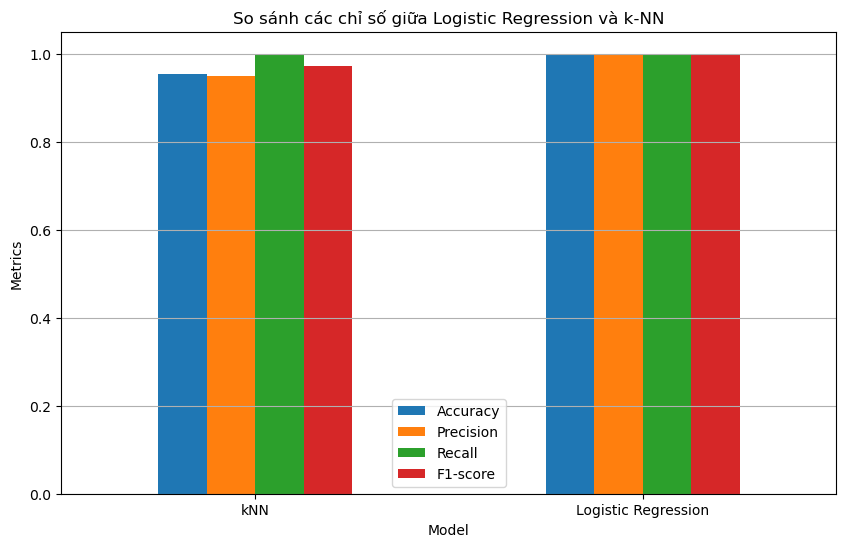

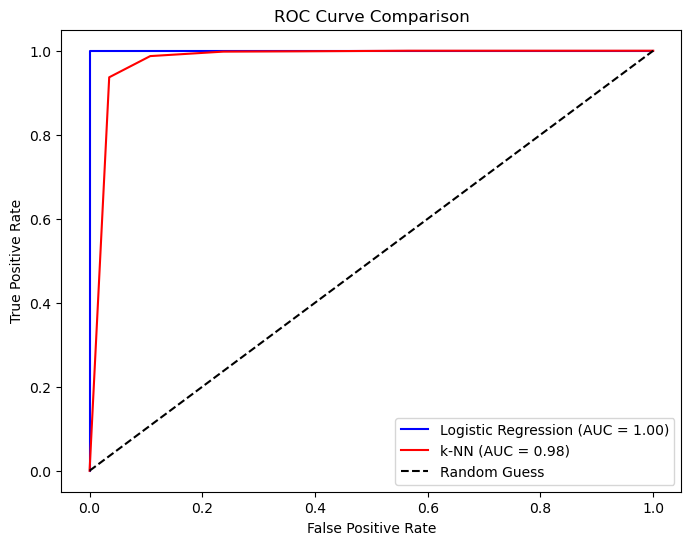

In [235]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import confusion_matrix, classification_report, roc_curve, auc, precision_score, recall_score, f1_score
from sklearn.preprocessing import LabelEncoder, StandardScaler
import matplotlib.pyplot as plt
import numpy as np

# 1. Xử lý dữ liệu (Giả sử `data_hc` đã được định nghĩa trước)
label_encoders = {}
for column in data_hc.columns:
    if data_hc[column].dtype == 'object':  # Kiểm tra kiểu dữ liệu
        le = LabelEncoder()
        data_hc[column] = le.fit_transform(data_hc[column])  # Mã hóa cột
        label_encoders[column] = le

# Giả sử cột cuối là nhãn
X = data_hc.iloc[:, :-1].values  # Các feature (dạng ndarray)
y = data_hc.iloc[:, -1].values   # Nhãn (label)

# Chia dữ liệu thành tập train và test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Chuẩn hóa dữ liệu
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# 2. Logistic Regression
logreg = LogisticRegression(max_iter=1000)
logreg.fit(X_train, y_train)
y_pred_logreg = logreg.predict(X_test)
y_prob_logreg = logreg.predict_proba(X_test)[:, 1]

# 3. K-Nearest Neighbors
knn = KNeighborsClassifier(n_neighbors=5)
knn.fit(X_train, y_train)
y_pred_knn = knn.predict(X_test)
y_prob_knn = knn.predict_proba(X_test)[:, 1]

# 4. Đánh giá Logistic Regression
accuracy_logreg = logreg.score(X_test, y_test)
precision_logreg = precision_score(y_test, y_pred_logreg)
recall_logreg = recall_score(y_test, y_pred_logreg)
f1_logreg = f1_score(y_test, y_pred_logreg)

# Đánh giá k-NN
accuracy_knn = knn.score(X_test, y_test)
precision_knn = precision_score(y_test, y_pred_knn)
recall_knn = recall_score(y_test, y_pred_knn)
f1_knn = f1_score(y_test, y_pred_knn)

# Tạo DataFrame so sánh
comparison_df = pd.DataFrame({
    'Model': ['kNN', 'Logistic Regression'],
    'Accuracy': [accuracy_knn, accuracy_logreg],
    'Precision': [precision_knn, precision_logreg],
    'Recall': [recall_knn, recall_logreg],
    'F1-score': [f1_knn, f1_logreg]
})

# Hiển thị bảng kết quả
print(comparison_df)

# Vẽ bảng dạng biểu đồ
plt.figure(figsize=(10, 6))
comparison_df.set_index('Model').plot(kind='bar', figsize=(10, 6))
plt.title('So sánh các chỉ số giữa Logistic Regression và k-NN')
plt.xlabel('Model')
plt.ylabel('Metrics')
plt.xticks(rotation=0)
plt.legend(loc="best")
plt.grid(axis='y')
plt.show()

# 5. Vẽ đường cong ROC cho cả hai mô hình
fpr_logreg, tpr_logreg, _ = roc_curve(y_test, y_prob_logreg)
roc_auc_logreg = auc(fpr_logreg, tpr_logreg)

fpr_knn, tpr_knn, _ = roc_curve(y_test, y_prob_knn)
roc_auc_knn = auc(fpr_knn, tpr_knn)

plt.figure(figsize=(8, 6))
plt.plot(fpr_logreg, tpr_logreg, label=f'Logistic Regression (AUC = {roc_auc_logreg:.2f})', color='blue')
plt.plot(fpr_knn, tpr_knn, label=f'k-NN (AUC = {roc_auc_knn:.2f})', color='red')
plt.plot([0, 1], [0, 1], 'k--', label="Random Guess")
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve Comparison')
plt.legend(loc="lower right")
plt.show()